In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from datetime import datetime as dt
from scipy import stats
from matplotlib.ticker import FuncFormatter

In [2]:
def billions(x, pos):
    """функция форматирования меток делений осей диаграмм
    параметры: 
    x - значение меток делений оси
    pos - позиционный номер форматируемой метки деления (используется Matplotlib)
    результат: возвращает значение в млрд. 
    """
    return '{:1.1f}'.format(x*1e-9)

In [3]:
def millions(x, pos):
    """функция форматирования меток делений осей диаграмм
    параметры: 
    x - значение меток делений оси
    pos - позиционный номер форматируемой метки деления (используется Matplotlib)
    результат: возвращает значение в млн. 
    """
    return '{:1.1f}'.format(x*1e-6)

In [4]:
def thousands(x, pos):
    """функция форматирования меток делений осей диаграмм
    параметры: 
    x - значение меток делений оси
    pos - позиционный номер форматируемой метки деления (используется Matplotlib)
    результат: возвращает значение в тыс. 
    """
    return '{:1.1f}'.format(x*1e-3)

In [5]:
def things(x, pos):
    """функция форматирования меток делений осей диаграмм
    параметры: 
    x - значение меток делений оси
    pos - позиционный номер форматируемой метки деления (используется Matplotlib)
    результат: возвращает значение без изменений 
    """
    return '{:1.0f}'.format(x)

In [6]:
# Настройки отображения данных
pd.set_option('display.max.columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

In [7]:
def draw2plot(table, chart, ord1, absc, ord2, suptitle, title1, title2, order1, order2, rotation, width = 16, height = 4):
    """функция для построения 2-ух диаграмм рядом, по 2-ум показателям
    
    параметры:
    table - таблица данных для построения диаграмм
    chart - тип диаграммы ('line' для линейчатой, 'bar' - для столбчатой)
    ord1 - переменная для оси ординат левой диаграммы 
    absc - переменная для оси абсцисс обоих диаграмм
    ord2 - переменная для оси ординат правой диаграммы
    suptitle - общий заголовок для диаграмм
    title1 - заголовок левой диаграммы 
    title2 - заголовок правой диаграммы
    order1 - имя функции для форматирования значений оси ординат левой диаграммы
    order2 - имя функции для форматирования значений оси ординат правой диаграммы
    rotatio - угол наклона подписей по оси абсцисс
    width - длина каждой из диаграмм, дюймов 
    height - высота каждой из диаграмм, дюймов
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(width, height))
    table.plot(kind=chart, y=ord1, x=absc, color='steelblue', ax=ax1, legend=None)
    table.plot(kind=chart, y=ord2, x=absc, color='coral', ax=ax2, legend=None)
    plt.suptitle(suptitle, fontsize=14, y=1.05)
    ax1.set_title(title1, fontsize=13)
    ax1.grid(axis = 'x')
    formatter1 = FuncFormatter(order1)
    ax1.yaxis.set_major_formatter(formatter1)
    ax1.tick_params(axis='x', labelrotation=rotation)
    ax2.set_title(title2, fontsize=13)
    ax2.grid(axis = 'x')
    formatter2 = FuncFormatter(order2)
    ax2.yaxis.set_major_formatter(formatter2)
    ax2.tick_params(axis='x', labelrotation=rotation)
    return(plt.show())

In [8]:
palette ={2020: 'C0', 2019: 'C1'}
sns.set_style('whitegrid')

def drawbar(absc, ordi, grad, table, title, ylabel, order):
    """функция для построения столбчатой диаграммы
    
    параметры:
    absc - переменная для оси абсцисс диаграммы
    ordi - переменная для оси ординат
    grad - подписи для легенды
    table - таблица данных для построения диаграммы
    title - заголовок диаграммы
    ylabel - подпись для оси ординат
    order - имя функции для форматирования значений оси ординат
    """
    fig, ax = plt.subplots(figsize=(14, 6))
    formatter = FuncFormatter(order)
    ax.yaxis.set_major_formatter(formatter)
    sns.barplot(x=absc, y=ordi, hue=grad, data = table, palette=palette)
    plt.title(title, size=14, loc='center')
    ax.tick_params(labelsize=12)
    ax.set_ylabel(ylabel, fontsize=11) # кегль шрифта переменной Y
    return(plt.show())

In [9]:
def drawbarmpl(table, absc, ord1, ord2, order, title, ylabel, rot):
    """функция для построения сравнительной столбчатой диаграммы для двух рядов данных
    
    параметры:
    table - таблица данных для построения диаграммы
    absc - переменная для оси абсцисс
    ord1 - переменная для первого ряда данных
    ord2 - переменная для второго ряда данных
    order - имя функции для форматирования значений оси ординат
    title - заголовок диаграммы
    ylabel - подпись для оси ординат
    rotatio -  угол наклона подписей по оси абсцисс

    """
    object_list = table[absc].unique()
    g1 = table[ord1].tolist()
    g2 = table[ord2].tolist()
    width = 0.4
    x = np.arange(len(object_list))
    fig, ax = plt.subplots(figsize=(16,6))
    formatter = FuncFormatter(order)
    ax.yaxis.set_major_formatter(formatter)
    rects1 = ax.bar(x - width/2, g1, width, label='2020')
    rects2 = ax.bar(x + width/2, g2, width, label='2019')
    ax.set_title(title, size=14, loc='center')
    ax.set_xticks(x)
    ax.set_xticklabels(object_list)
    ax.legend()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(axis = 'x')
    plt.xticks(rotation=rot)
    return(plt.show())    

### Расчеты и исследования

In [10]:
# Открываем файл с данными, сохраненный после EDA
sel = pd.read_csv('sel.csv')

In [11]:
# Изменим форматирование дат на datetime:
sel_columns = ['Дата регистрации', 'Дата обременения', 'Дата ДДУ', 'Дата регистрации модель']
for col in sel_columns:
    sel[col] = pd.to_datetime(sel[col])

In [12]:
sel.head()

Файл  ID ЖК           ЖК рус        ЖК англ                     Район Город  \
0  SPB   4603      Мурино парк            NaN                     Мурино (г.)   
1   NM   4333   Румянцево Парк            NaN                      Московский   
2   MO   1957       Афродита-2            NaN      Пироговский (бывш. п.г.т.)   
3  SPB   3469  Полюстрово Парк            NaN  муниципальный округ Пискаревка   
4  SPB   2491    Виктори Плаза  Victory Plaza    муниципальный округ Звездное   

         Округ Направление                 Регион                      АТД  \
0  Всеволожский район (ЛО)  Ленинградская область  Всеволожский район (ЛО)   
1                      НАО           Новая Москва                      НАО   
2        Ярославское шоссе     Московская область   Мытищи городской округ   
3  Калининский район (СПб)        Санкт-Петербург  Калининский район (СПб)   
4   Московский район (СПб)        Санкт-Петербург   Московский район (СПб)   

        Застройщик ЖК                                 Описание помещения  \
0            Запстрой  квартира, номер этажа: 8,секция 5/3,оси 8с-9с,...   
1  Lexion Development  квартира, номер этажа: 10, секция 20, номер об...   
2           Березовец  1 - комнатная квартира, номер этажа: 2 секция ...   
3          Setl Group  однокомнатная квартира, номер этажа: 13, номер...   
4          Setl Group  четырехкомнатная квартира, номер этажа: 3, ном...   

   Площадь  Комнатность Тип Комнатности  Кол-во комнат  Этаж Номер  \
0     20.3          NaN              ст            0.0     8   527   
1     84.8          NaN               3            3.0    10  1704   
2     26.5          1.0              ст            0.0     2   197   
3     35.6          1.0               1            1.0    13  1297   
4    154.2          4.0               4            4.0     3   110   

  Тип помещения     Корпус     Покупатель ЮЛ  Покупатель ФЛ  \
0      квартира   корпус 1               NaN      1200620.0   
1      квартира   корпус 3               NaN      1812637.0   
2      квартира  корпус 19               NaN        13916.0   
3      квартира   корпус 1               NaN      1505156.0   
4      квартира   корпус 1  ООО "Сэтл Строй"            NaN   

                      Номер регистрации Дата регистрации  \
0   47:07:0722001:22514-47/012/2019-332       2019-07-12   
1  77:17:0000000:11676-77/017/2020-4137       2020-03-16   
2      50:12:0090234:32-50/001/2019-334       2019-10-09   
3   78:10:0005136:8383-78/037/2019-3275       2019-02-04   
4       78:14:0765001:2-78/034/2019-233       2019-04-19   

          Условия обременения                     Номер обременения  \
0                         NaN                                   NaN   
1                 240 месяцев  77:17:0000000:11676-77/017/2020-4138   
2                         NaN                                   NaN   
3  с 04.02.2019 по 22.01.2026   78:10:0005136:8383-78/037/2019-3276   
4                         NaN                                   NaN   

  Дата обременения       Залогодержатель  Длительность обременения  \
0              NaT                   NaN                       NaN   
1       2020-03-16        РОССЕЛЬХОЗБАНК                     240.0   
2              NaT                   NaN                       NaN   
3       2019-02-04  БАНК САНКТ-ПЕТЕРБУРГ                       NaN   
4              NaT                   NaN                       NaN   

  Тип обременения  Оценка цены  Оценка цены 1 кв.м   Дата ДДУ  Уступка  \
0             NaN    1567525.0             77218.0 2019-07-01        1   
1         ипотека    9445100.0            111380.9 2020-02-12        0   
2             NaN    1961795.0             74030.0 2019-09-18        0   
3         ипотека    4314150.0            121184.0 2019-01-22        1   
4             NaN   39135960.0            253800.0 2019-04-01        1   

   Купил лотов в ЖК  ID Корпус  Пол    класс Срок сдачи Стадия строительства  \
0                 1    22572.0    f   эконом  4 кв 2022

In [13]:
# Добавим столбцы для агрегации по периодам:
sel['Год'] = sel['Дата регистрации'].apply(lambda x: x.year)
sel['Месяц'] = sel['Дата регистрации'].apply(lambda x: x.month)
sel['Год Месяц'] = sel['Дата регистрации'].dt.strftime('%Y-%m')

In [14]:
# Добавим столбец с наличием и типом обременения:
sel.insert(28, 'Обременения', sel['Тип обременения'], True)
sel.loc[(sel['Тип обременения'].isnull()), 'Обременения'] = 'отсутствуют'

In [15]:
# Сделаем некоторые замены для лучшего отображения  на диаграммах:
sel['Район Город'] = sel['Район Город'].str.replace('муниципальный округ', 'МО', regex = True)
sel['Район Город'] = sel['Район Город'].str.replace('\(п.г.т.\)', 'пгт', regex = True)
sel['АТД'] = sel['АТД'].str.replace('район \(СПб\)', 'р-н', regex = True)
sel['АТД'] = sel['АТД'].str.replace('район \(Спб\)', 'р-н', regex = True)
sel['АТД'] = sel['АТД'].str.replace('район \(ЛО\)', 'р-н', regex = True)
sel['АТД'] = sel['АТД'].str.replace('городской округ', 'гор.округ', regex = True)
sel['Округ Направление'] = sel['Округ Направление'].str.replace('шоссе', 'ш.', regex = True)
sel['Округ Направление'] = sel['Округ Направление'].str.replace('район \(СПб\)', 'р-н', regex = True)
sel['Округ Направление'] = sel['Округ Направление'].str.replace('район \(Спб\)', 'р-н', regex = True)
sel['Округ Направление'] = sel['Округ Направление'].str.replace('район \(ЛО\)', 'р-н', regex = True)

In [16]:
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace('МОСКОВСКИЙ КРЕДИТНЫЙ БАНК', 'БАНК МКБ', regex = True)
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace('Научно-производственная фирма', 'НПФ', regex = True)
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace('Финансово-строительная компания', 'ФСК', regex = True)
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace\
    (' Российский Банк поддержки малого и среднего предпринимательства', 'МСП Банк', regex = True)
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace('СБЕРБАНК РОССИИ', 'СБЕРБАНК', regex = True)
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace\
    ('АО ФСК "РУССКОЕ ЗОЛОТО-СТРОЙИНВЕСТ"', 'АО ФСК "РЗ-СТРОЙИНВЕСТ"', regex = True)
sel['Залогодержатель'] = sel['Залогодержатель'].str.replace\
    ('ООО "На Тружениковом переулке"', 'ООО "На Тружениковом пер."', regex = True)

In [17]:
# Добавим столбец, в который скопируем всех известных покупателей:
sel.insert(21, 'Все покупатели', sel['Покупатель ФЛ'], True)
sel.loc[sel['is_buyer_ul'] == 1, 'Все покупатели'] = sel.loc[sel['is_buyer_ul'] == 1, 'Покупатель ЮЛ']

In [18]:
# Нет указания на покупателя: 324 записи и все они - ФЛ (is_buyer_ul = 0):
sel.loc[sel['Все покупатели'].isnull()]['is_buyer_ul'].value_counts(dropna = False)

0    324
Name: is_buyer_ul, dtype: int64

#### Продажи по годам

In [19]:
# Продажи по годам:
rev_year = sel.groupby(['Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}) 

rev_year.head()

Год  Оценка выручки  Кол-во помещений
0  2019  929591237857.0            151134
1  2020 1015665913218.0            139949

In [20]:
# Сумма продаж помещений за 2 года для анализируемых территорий:
revenue = rev_year['Оценка выручки'].sum()

# По годам:
revenue2019 = rev_year.loc[rev_year['Год'] == 2019]['Оценка выручки'][0]
revenue2020 = rev_year.loc[rev_year['Год'] == 2020]['Оценка выручки'][1]

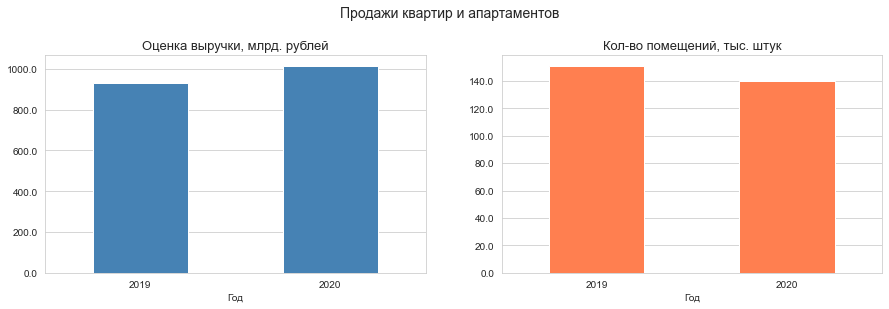

In [21]:
# Визуализируем:
draw2plot(rev_year, 'bar',
         'Оценка выручки','Год',  'Кол-во помещений', 
         'Продажи квартир и апартаментов', 'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук', 
         billions, thousands, 0, 15, 4)

In [22]:
# Агрегируем данные по типу покупателей:
deal_year = sel.groupby(['is_buyer_ul', 'Год']).agg({'Все покупатели': 'count'}).reset_index()\
    .rename(columns={'is_buyer_ul': 'Тип покупателя','Все покупатели': 'Кол-во сделок'}) 
deal_year

Тип покупателя   Год  Кол-во сделок
0               0  2019         132414
1               0  2020         127568
2               1  2019          18713
3               1  2020          12064

In [23]:
# Кол-во уникальных покупателей по годам:
buyer_year = sel.groupby(['is_buyer_ul', 'Год']).agg({'Все покупатели': 'nunique'}).reset_index()\
    .rename(columns={'is_buyer_ul': 'Тип покупателя','Все покупатели': 'Кол-во покупателей'})   
buyer_year

Тип покупателя   Год  Кол-во покупателей
0               0  2019              120222
1               0  2020              117318
2               1  2019                 818
3               1  2020                 642

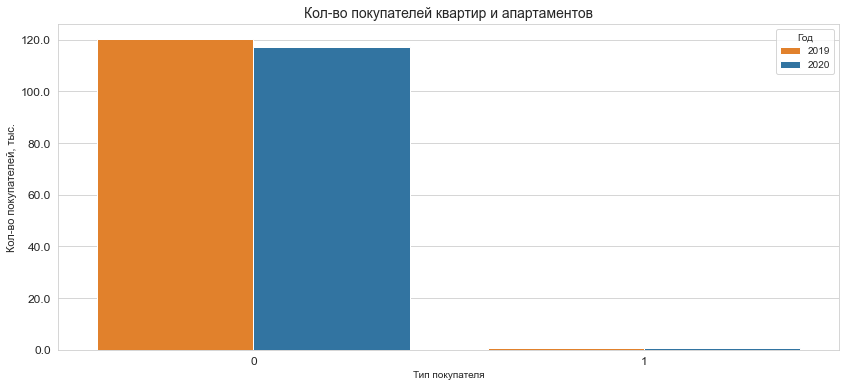

In [24]:
# Визуализируем:
drawbar('Тип покупателя', 'Кол-во покупателей', 'Год', buyer_year, 
        'Кол-во покупателей квартир и апартаментов', 'Кол-во покупателей, тыс.', thousands)
# 0 - ФЛ, 1 - ЮЛ 
plt.show()

#### Продажи по месяцам

In [25]:
# Агрегируем по месяцам:
rev_month = sel.groupby(['Год', 'Год Месяц']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}) 
rev_month.head()

Год Год Месяц  Оценка выручки  Кол-во помещений
0  2019   2019-01   59182301814.0             10429
1  2019   2019-02   73744683561.0             12638
2  2019   2019-03   72947501406.0             12498
3  2019   2019-04   83721624520.0             13733
4  2019   2019-05   79347069688.0             13074

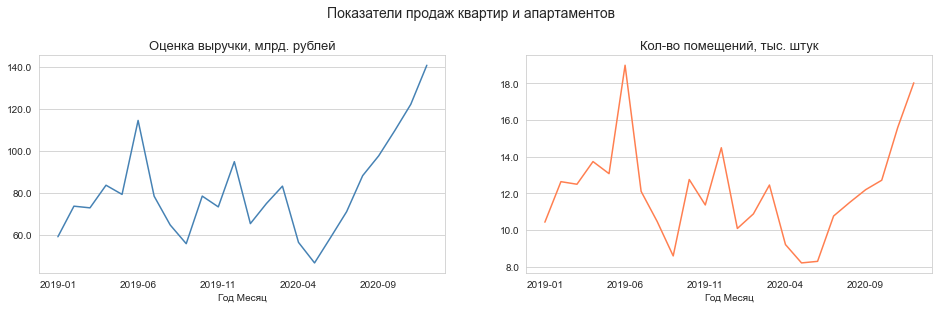

In [26]:
# Продажи по месяцам:
# Что случилось в июне 2019 г., почему такой рост продаж? 
# Вероятно, новости о переходе отрасли на эскроу-счета
draw2plot(rev_month, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов', 'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 0)

> #### по классам помещений:

In [27]:
# Агрегируем по месяцам и классам:
revcl_month = sel.groupby(['Год', 'Год Месяц', 'класс']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}) 
# revcl_month.head()

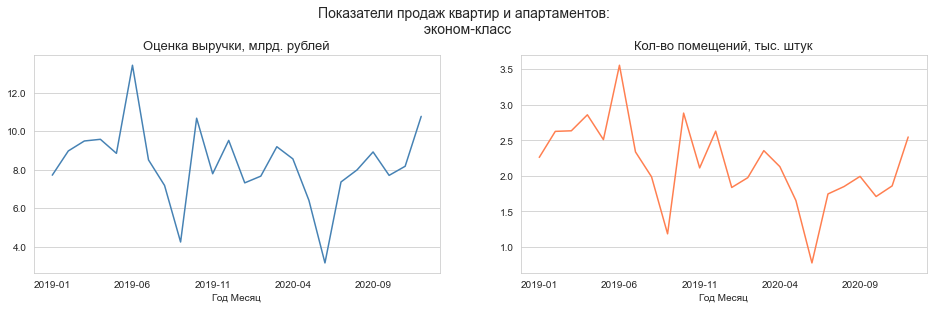

In [28]:
# Эконом-класс:
revcl_ec = revcl_month.loc[revcl_month['класс'] == 'эконом']
draw2plot(revcl_ec, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов: \n эконом-класс', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 0)

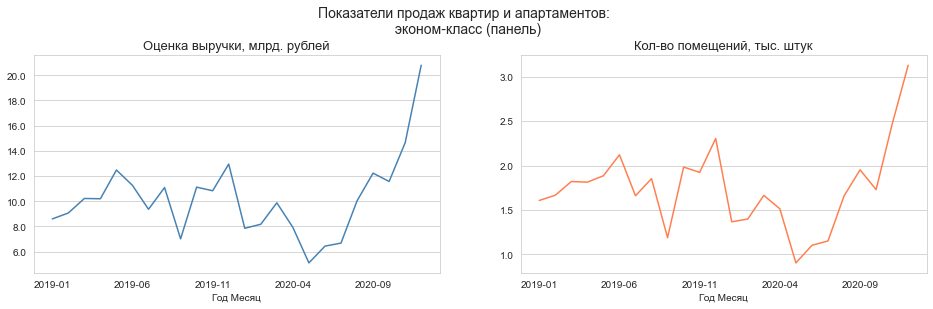

In [29]:
# Эконом-класс (панель):
revcl_ecp = revcl_month.loc[revcl_month['класс'] == 'эконом (панель)']
draw2plot(revcl_ecp, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов: \n эконом-класс (панель)', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 0)

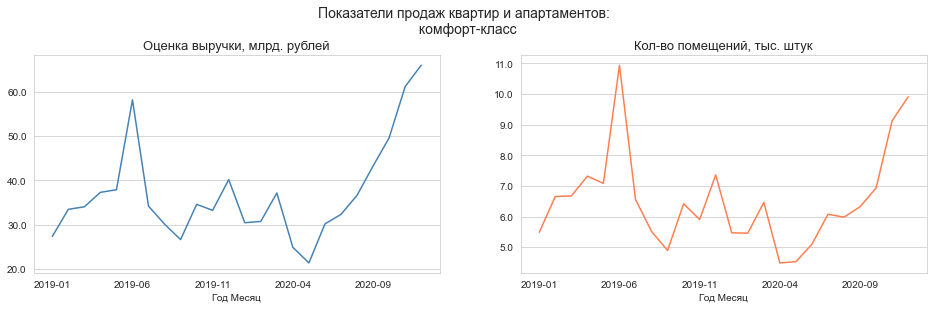

In [30]:
# Комфорт-класс:
revcl_com = revcl_month.loc[revcl_month['класс'] == 'комфорт']
draw2plot(revcl_com, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов: \n комфорт-класс', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 0)

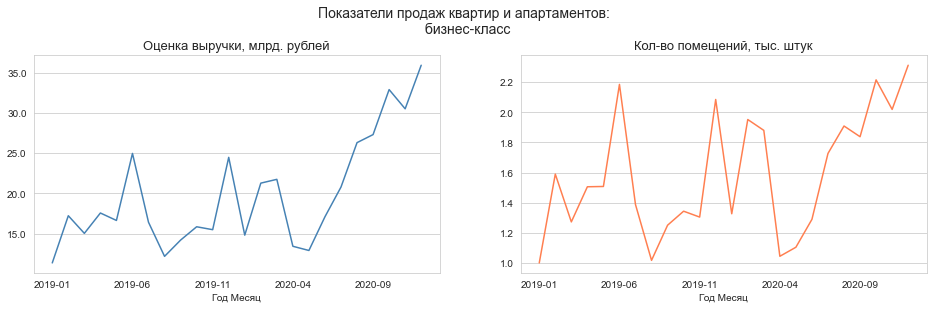

In [31]:
# Бизнес-класс:
revcl_bus = revcl_month.loc[revcl_month['класс'] == 'бизнес']
draw2plot(revcl_bus, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов: \n бизнес-класс', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 0)

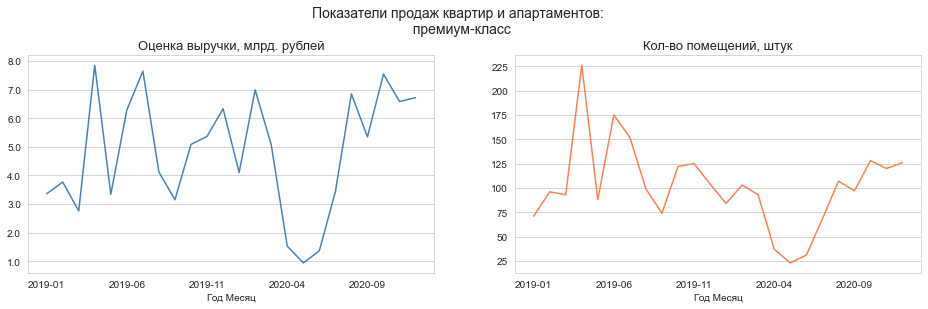

In [32]:
# Премиум-класс:
revcl_pr = revcl_month.loc[revcl_month['класс'] == 'премиум']
draw2plot(revcl_pr, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов: \n премиум-класс', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, штук',
         billions, things, 0)

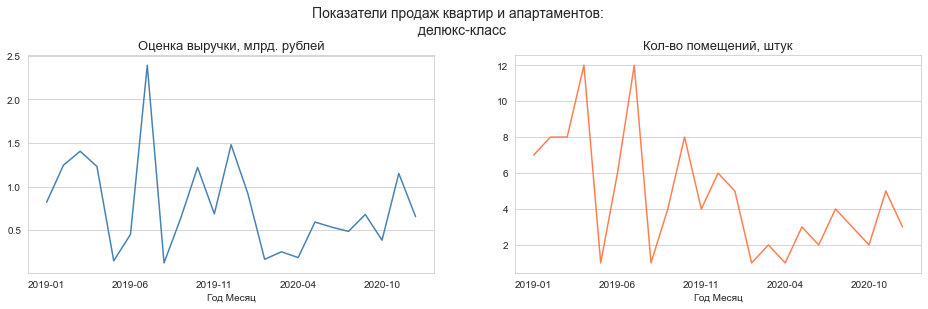

In [33]:
# Делюкс-класс:
revcl_dl = revcl_month.loc[revcl_month['класс'] == 'де-люкс']
draw2plot(revcl_dl, 'line', 'Оценка выручки', 'Год Месяц', 'Кол-во помещений', 
          'Показатели продаж квартир и апартаментов: \n делюкс-класс', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, штук',
         billions, things, 0)

#### Средние по годам

In [34]:
# Агрегируем по годам:
averages_year = sel.groupby(['Год', 'Тип помещения']).mean()[['Оценка цены 1 кв.м', 'Оценка цены', 'Площадь']].reset_index()\
    .rename(columns={'Оценка цены 1 кв.м': 'Оценка средней цены 1 кв.м','Оценка цены': 'Оценка средней цены помещения',
                    'Площадь': 'Средняя площадь помещения'}) 
averages_year

Год Тип помещения  Оценка средней цены 1 кв.м  \
0  2019    апартамент                    168942.2   
1  2019      квартира                    121553.3   
2  2020    апартамент                    163201.6   
3  2020      квартира                    144838.7   

   Оценка средней цены помещения  Средняя площадь помещения  
0                      7250068.9                       37.9  
1                      6090192.6                       47.2  
2                      6827064.0                       37.2  
3                      7292539.9                       47.7

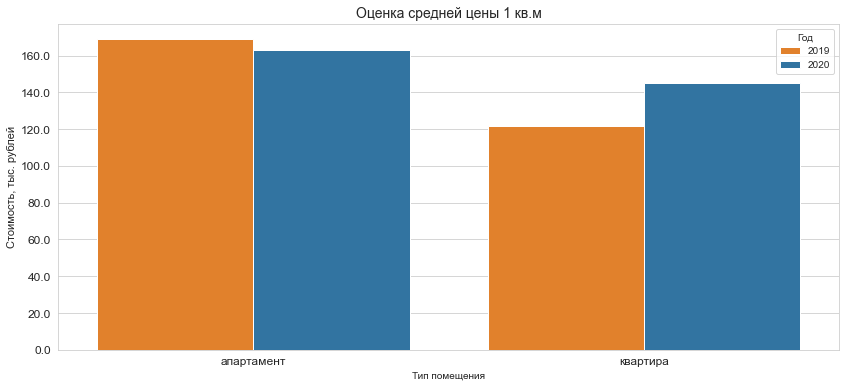

In [35]:
# Визуализируем для средней цены 1 кв.м:
drawbar('Тип помещения', 'Оценка средней цены 1 кв.м', 'Год', 
        averages_year, 'Оценка средней цены 1 кв.м', 'Стоимость, тыс. рублей', thousands)

#### Средние по месяцам

In [36]:
# Агрегируем по месяцам:
averages_month = sel.groupby(['Год', 'Год Месяц']).mean()[['Оценка цены 1 кв.м', 'Оценка цены', 'Площадь']].reset_index()\
    .rename(columns={'Оценка цены 1 кв.м': 'Оценка средней цены 1 кв.м','Оценка цены': 'Оценка средней цены помещения',
                    'Площадь': 'Средняя площадь помещения'}) 
averages_month.head()

Год Год Месяц  Оценка средней цены 1 кв.м  Оценка средней цены помещения  \
0  2019   2019-01                    116198.4                      5674782.0   
1  2019   2019-02                    118084.8                      5835154.6   
2  2019   2019-03                    119059.6                      5836734.0   
3  2019   2019-04                    123315.8                      6096382.8   
4  2019   2019-05                    122944.9                      6069073.7   

   Средняя площадь помещения  
0                       45.8  
1                       46.4  
2                       46.6  
3                       46.1  
4                       47.1

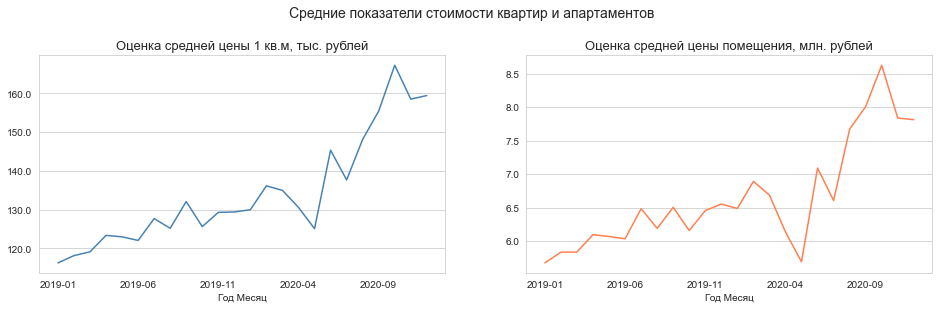

In [37]:
# Оценки средней цены 1 кв. м и средней цены помещения:
draw2plot(averages_month, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов', 'Оценка средней цены 1 кв.м, тыс. рублей', 
             'Оценка средней цены помещения, млн. рублей',
            thousands, millions, 0)

In [38]:
# По типам помещений:
averages_flat = sel.loc[sel['Тип помещения'] == 'квартира'].groupby(['Год', 'Год Месяц']).mean()[['Оценка цены 1 кв.м', 'Оценка цены', 'Площадь']].reset_index()\
    .rename(columns={'Оценка цены 1 кв.м': 'Оценка средней цены 1 кв.м','Оценка цены': 'Оценка средней цены помещения',
                    'Площадь': 'Средняя площадь помещения'})

averages_apart = sel.loc[sel['Тип помещения'] == 'апартамент'].groupby(['Год', 'Год Месяц']).mean()[['Оценка цены 1 кв.м', 'Оценка цены', 'Площадь']].reset_index()\
    .rename(columns={'Оценка цены 1 кв.м': 'Оценка средней цены 1 кв.м','Оценка цены': 'Оценка средней цены помещения',
                    'Площадь': 'Средняя площадь помещения'})
# averages_flat

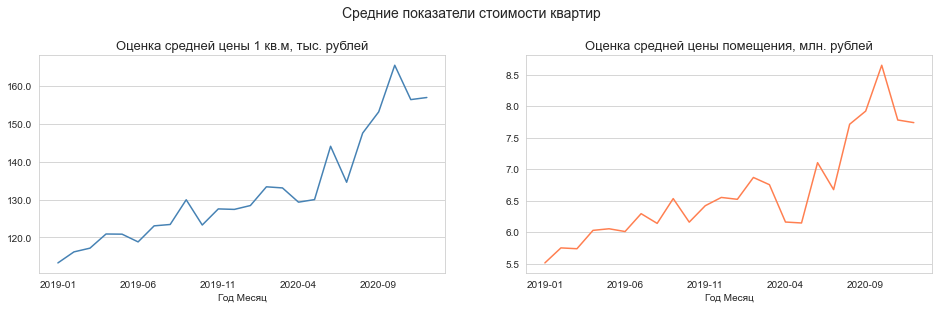

In [39]:
# Оценки средней цены 1 кв. м и средней цены квартиры:
draw2plot(averages_flat, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир', 'Оценка средней цены 1 кв.м, тыс. рублей', 
             'Оценка средней цены помещения, млн. рублей',
            thousands, millions, 0)

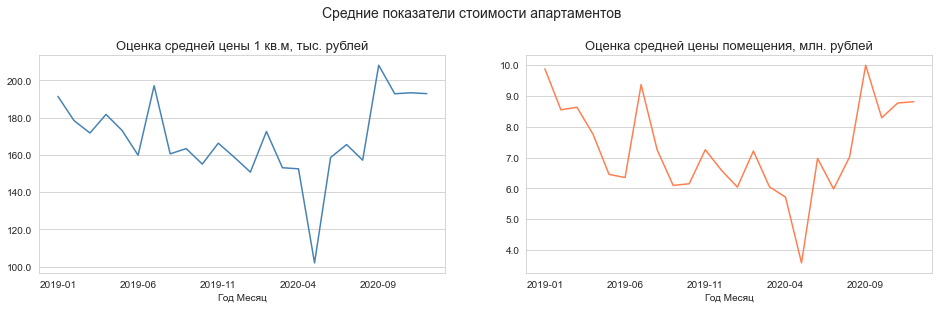

In [40]:
# Оценки средней цены 1 кв. м и средней цены апартамента:
draw2plot(averages_apart, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости апартаментов', 'Оценка средней цены 1 кв.м, тыс. рублей', 
             'Оценка средней цены помещения, млн. рублей',
            thousands, millions, 0)

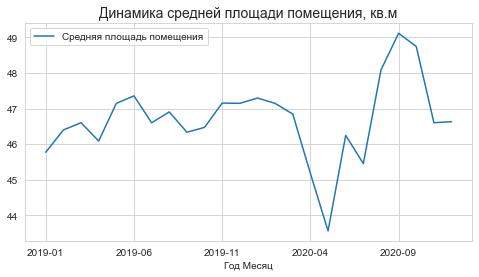

In [41]:
# Средняя площадь реализованных помещений:
averages_month.plot(y='Средняя площадь помещения', x='Год Месяц', figsize=(8, 4))
plt.title('Динамика средней площади помещения, кв.м', fontsize=14)
plt.show()

> #### по классам помещений:

In [42]:
# Агрегируем по месяцам и классам:
averagescl_month = sel.groupby(['Год', 'Год Месяц', 'класс']).mean()[['Оценка цены 1 кв.м', 'Оценка цены', 'Площадь']].reset_index()\
    .rename(columns={'Оценка цены 1 кв.м': 'Оценка средней цены 1 кв.м','Оценка цены': 'Оценка средней цены помещения',
                    'Площадь': 'Средняя площадь помещения'}) 
# averagescl_month.head()

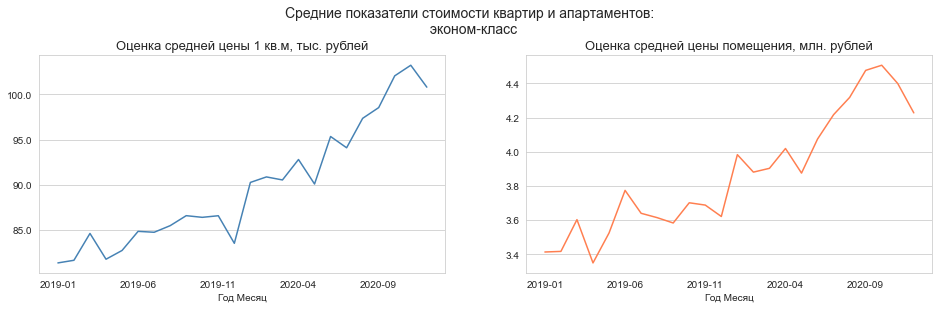

In [43]:
# Эконом-класс:
averagescl_ec = averagescl_month.loc[averagescl_month['класс'] == 'эконом']
draw2plot(averagescl_ec, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов: \n эконом-класс', 
             'Оценка средней цены 1 кв.м, тыс. рублей', 'Оценка средней цены помещения, млн. рублей',
         thousands, millions, 0)

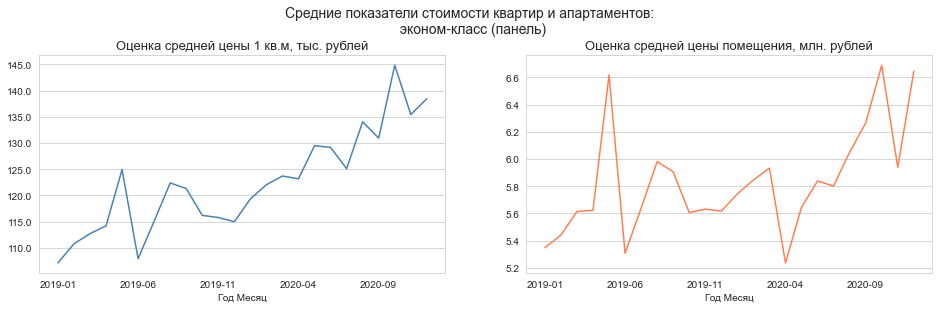

In [44]:
# Эконом-класс (панель):
averagescl_ecp = averagescl_month.loc[averagescl_month['класс'] == 'эконом (панель)']
draw2plot(averagescl_ecp, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов: \n эконом-класс (панель)', 
             'Оценка средней цены 1 кв.м, тыс. рублей', 'Оценка средней цены помещения, млн. рублей',
         thousands, millions, 0)

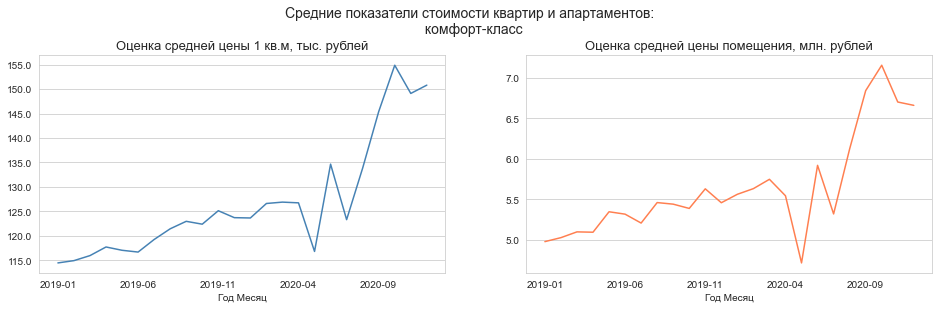

In [45]:
# Комфорт-класс:
averagescl_com = averagescl_month.loc[averagescl_month['класс'] == 'комфорт']
draw2plot(averagescl_com, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов: \n комфорт-класс', 
             'Оценка средней цены 1 кв.м, тыс. рублей', 'Оценка средней цены помещения, млн. рублей',
            thousands, millions, 0)

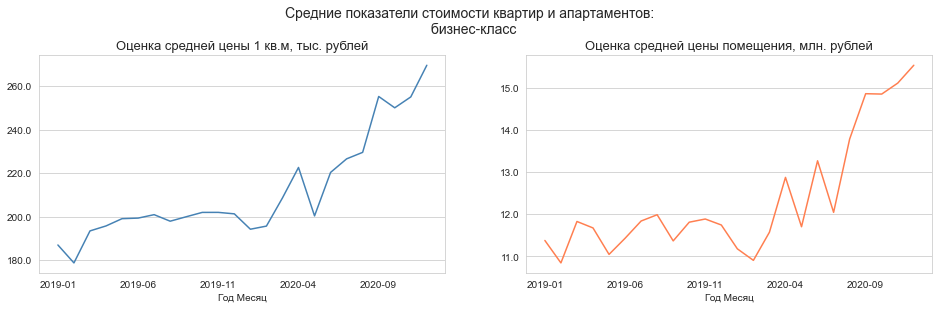

In [46]:
# Бизнес-класс:
averagescl_bus = averagescl_month.loc[averagescl_month['класс'] == 'бизнес']
draw2plot(averagescl_bus, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов: \n бизнес-класс', 
             'Оценка средней цены 1 кв.м, тыс. рублей', 'Оценка средней цены помещения, млн. рублей',
         thousands, millions, 0)

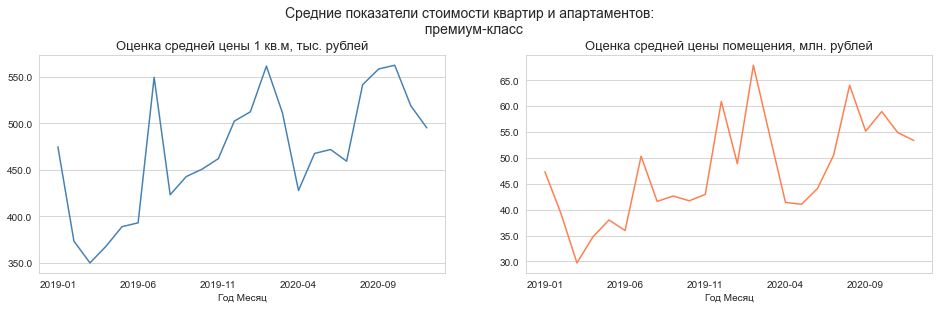

In [47]:
# Премиум-класс:
averagescl_pr = averagescl_month.loc[averagescl_month['класс'] == 'премиум']
draw2plot(averagescl_pr, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов: \n премиум-класс', 
             'Оценка средней цены 1 кв.м, тыс. рублей', 'Оценка средней цены помещения, млн. рублей',
            thousands, millions, 0)

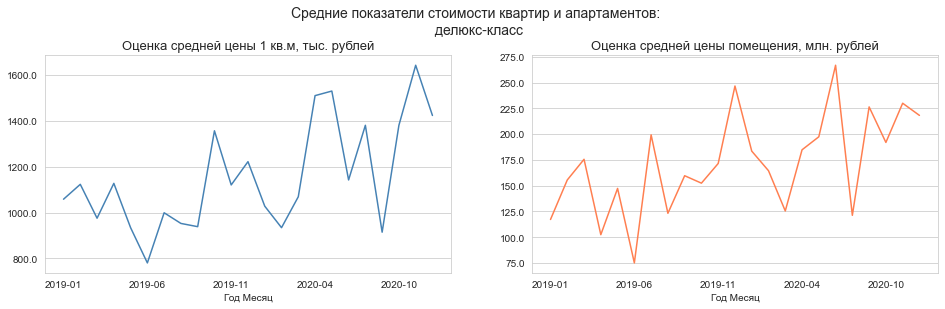

In [48]:
# Делюкс-класс:
averagescl_dl = averagescl_month.loc[averagescl_month['класс'] == 'де-люкс']
draw2plot(averagescl_dl, 'line', 'Оценка средней цены 1 кв.м', 'Год Месяц', 'Оценка средней цены помещения', 
             'Средние показатели стоимости квартир и апартаментов: \n делюкс-класс', 
             'Оценка средней цены 1 кв.м, тыс. рублей', 'Оценка средней цены помещения, млн. рублей',
            thousands, millions, 0)

#### Продажи по типам помещений

In [49]:
# Продажи по типам помещений:
type_year = sel.groupby(['Тип помещения', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})
type_rev = type_year.sort_values('Оценка выручки', ascending=False)
type_qua = type_year.sort_values('Кол-во помещений', ascending=False)
# type_year

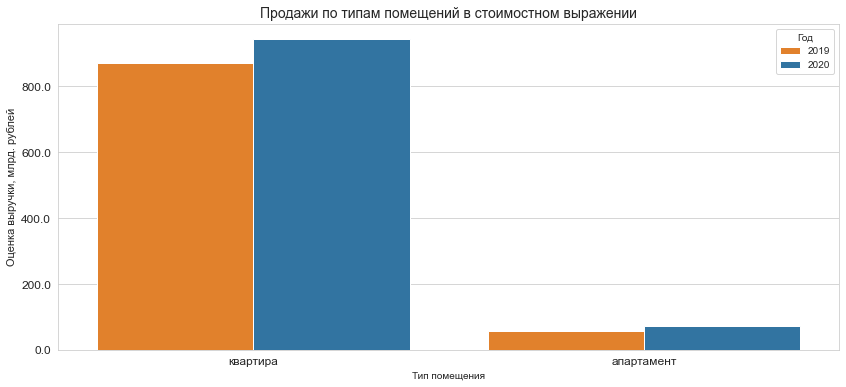

In [50]:
# Продажи по типам помещений в стоимостном выражении:
drawbar('Тип помещения', 'Оценка выручки', 'Год', 
        type_rev, 'Продажи по типам помещений в стоимостном выражении', 'Оценка выручки, млрд. рублей', billions)

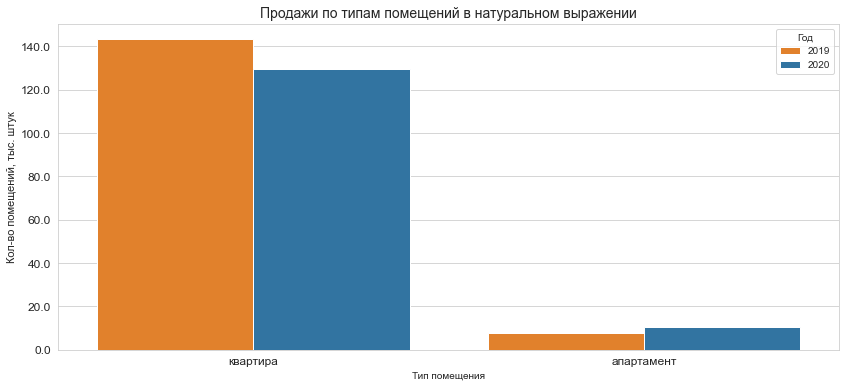

In [51]:
# Продажи по типам помещений в натуральном выражении:
drawbar('Тип помещения', 'Кол-во помещений', 'Год', 
        type_qua, 'Продажи по типам помещений в натуральном выражении', 'Кол-во помещений, тыс. штук', thousands)

#### Продажи по классам помещений

In [52]:
# Продажи по классам помещений:
class_year = sel.groupby(['класс', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})
class_rev = class_year.sort_values('Оценка выручки', ascending=False)
class_qua = class_year.sort_values('Кол-во помещений', ascending=False)

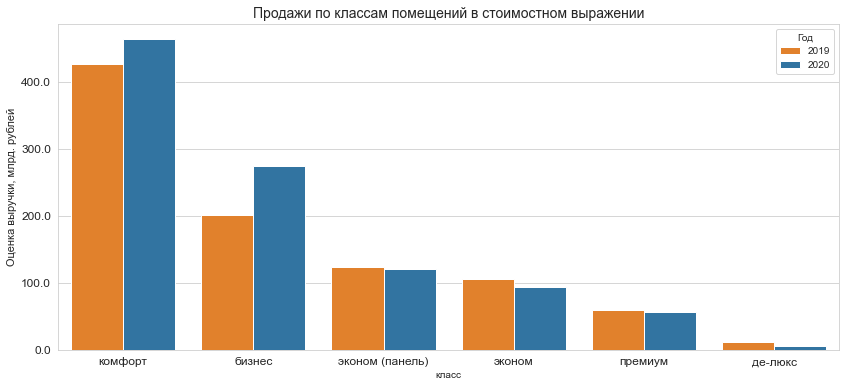

In [53]:
# Продажи по классам помещений в стоимостном выражении:
drawbar('класс', 'Оценка выручки', 'Год', class_rev, 'Продажи по классам помещений в стоимостном выражении', 
        'Оценка выручки, млрд. рублей', billions)

In [54]:
# В табличном виде данные о продажах по классам помещений и годам:
classes = sel.pivot_table(index = 'класс', columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()\
                    .sort_values(('Оценка выручки', 2020), ascending = False)
classes

класс Оценка выручки                Кол-во помещений       
Год                            2019           2020             2019   2020
2            комфорт 427059486582.0 463684581717.0            80788  75831
0             бизнес 201558815655.0 275019165985.0            17454  20619
5    эконом (панель) 124153875767.0 121281749121.0            21824  20031
4             эконом 105883907560.0  93173471590.0            29566  22420
3            премиум  59095748414.0  56509126279.0             1425   1017
1            де-люкс  11839403879.0   5997818526.0               77     31

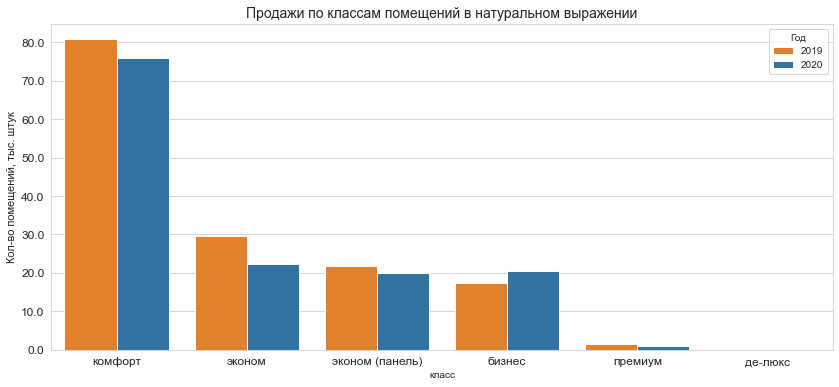

In [55]:
# Продажи по классам помещений в натуральном выражении:
drawbar('класс', 'Кол-во помещений', 'Год', class_qua, 'Продажи по классам помещений в натуральном выражении', 
        'Кол-во помещений, тыс. штук', thousands)

#### Продажи помещений по количеству комнат

In [56]:
# Продажи помещений по кол-ву комнат:
roomsize_year = sel.groupby(['Кол-во комнат', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})
roomsize_year['Кол-во комнат'] = roomsize_year['Кол-во комнат'].map({0:'студия', 1:'1-комн.', 2:'2-комн.', 3:'3-комн.', 4:'4 и более комн.'})

roomsize_rev = roomsize_year.sort_values('Оценка выручки', ascending=False)
roomsize_qua = roomsize_year.sort_values('Кол-во помещений', ascending=False)

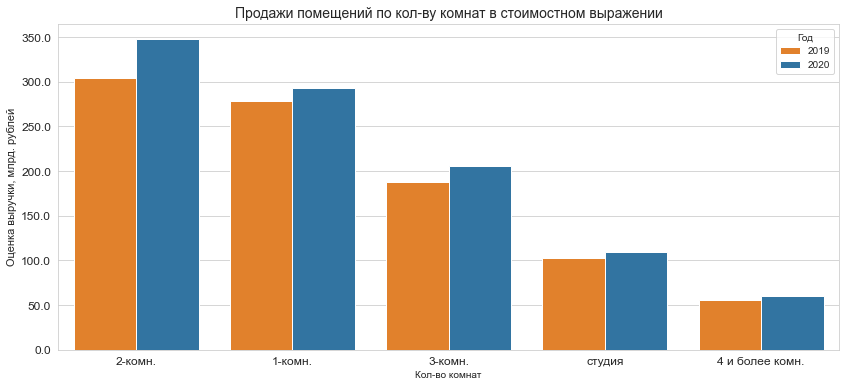

In [57]:
# Продажи помещений в стоимостном выражении:
drawbar('Кол-во комнат', 'Оценка выручки', 'Год', roomsize_rev, 'Продажи помещений по кол-ву комнат в стоимостном выражении', 
        'Оценка выручки, млрд. рублей', billions)

In [58]:
# В табличном виде данные о продажах по кол-ву комнат помещений и годам:
roomsizes = sel.pivot_table(index = 'Кол-во комнат', columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
roomsizes['Кол-во комнат'] = roomsizes['Кол-во комнат'].map({0:'студия', 1:'1-комн.', 2:'2-комн.', 3:'3-комн.', 4:'4-комн.'})
roomsizes

Кол-во комнат Оценка выручки                Кол-во помещений       
Год                         2019           2020             2019   2020
0          студия 102455909192.0 109236824634.0            34545  31516
1         1-комн. 278673241905.0 292963044758.0            57334  51456
2         2-комн. 304437762193.0 347608180532.0            41396  39765
3         3-комн. 187819834612.0 205948085254.0            15952  15413
4         4-комн.  56204489955.0  59909778040.0             1907   1799

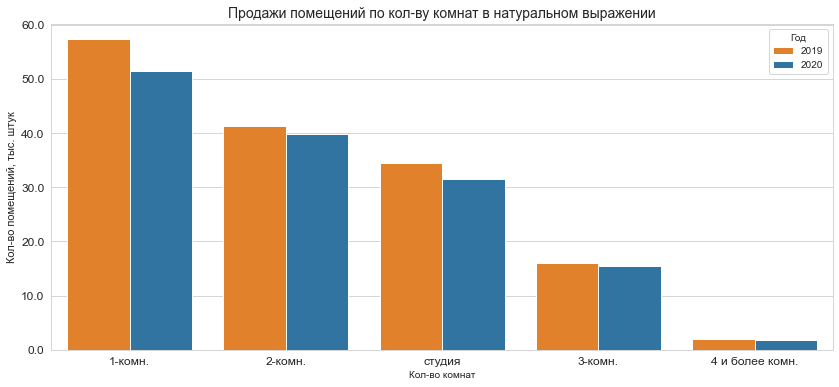

In [59]:
# Продажи помещений в натуральном выражении:
drawbar('Кол-во комнат', 'Кол-во помещений', 'Год', roomsize_qua, 'Продажи помещений по кол-ву комнат в натуральном выражении', 
        'Кол-во помещений, тыс. штук', thousands)

#### Продажи по этажам

In [60]:
# Добавим группы по этажам:
floor_grades = ['1-2 этажи', '3-7 этажи', '8-15 этажи', '16-25 этажи', '26 этаж и выше'] 
floor_bins = [0, 2, 7, 15, 25, 80] 
sel['Категория этажности'] = pd.cut(sel['Этаж'], bins = floor_bins, labels = floor_grades)
# sel[['Этаж', 'Категория этажности']].head(20)

In [61]:
# Продажи помещений в зависимости от этажа:
floor_year = sel.groupby(['Категория этажности', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})

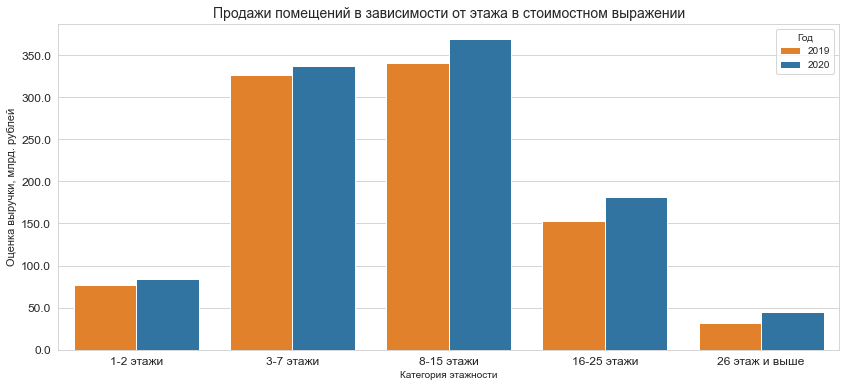

In [62]:
# Продажи помещений в стоимостном выражении:
drawbar('Категория этажности', 'Оценка выручки', 'Год', floor_year, 'Продажи помещений в зависимости от этажа в стоимостном выражении', 
        'Оценка выручки, млрд. рублей', billions)

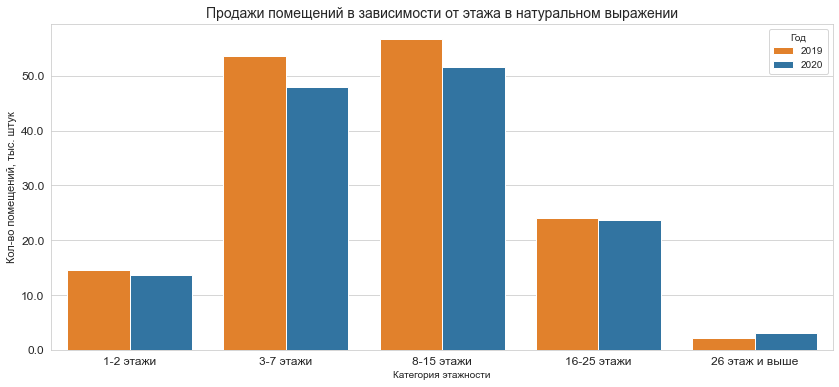

In [63]:
# Продажи помещений в натуральном выражении:
drawbar('Категория этажности', 'Кол-во помещений', 'Год', floor_year, 'Продажи помещений в зависимости от этажа в натуральном выражении', 
        'Кол-во помещений, тыс. штук', thousands)

In [64]:
# Распределение ЖК по этажности:
# Данных по этажности ЖК нет, можем опираться только на информацию по сделкам (!)
buildings = sel.groupby(['ID ЖК', 'Год']).agg({'Этаж': 'max'}).reset_index().rename(columns={'Этаж': 'Этажность'})
# Добавим группы по этажам:
buildings_grades = ['1-2 этажи', '3-7 этажи', '8-15 этажи', '16-25 этажи', '26 этаж и выше'] 
buildings_bins = [0, 2, 7, 15, 25, 80] 
buildings['Категория этажности'] = pd.cut(buildings['Этажность'], bins = buildings_bins, labels = buildings_grades)

In [65]:
buildings_floor = buildings.groupby(['Категория этажности', 'Год']).agg({'ID ЖК': 'count'}).reset_index()\
                .rename(columns={'ID ЖК': 'Кол-во ЖК'})
# buildings_floor

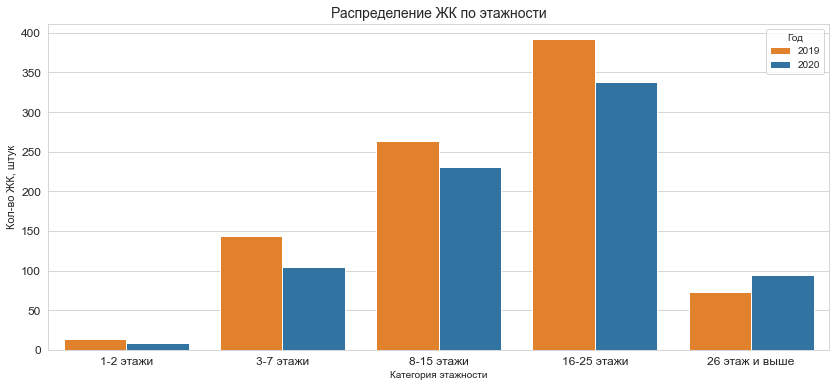

In [66]:
drawbar('Категория этажности', 'Кол-во ЖК', 'Год', buildings_floor, 'Распределение ЖК по этажности', 
        'Кол-во ЖК, штук', things)

#### Продажи помещений по площади

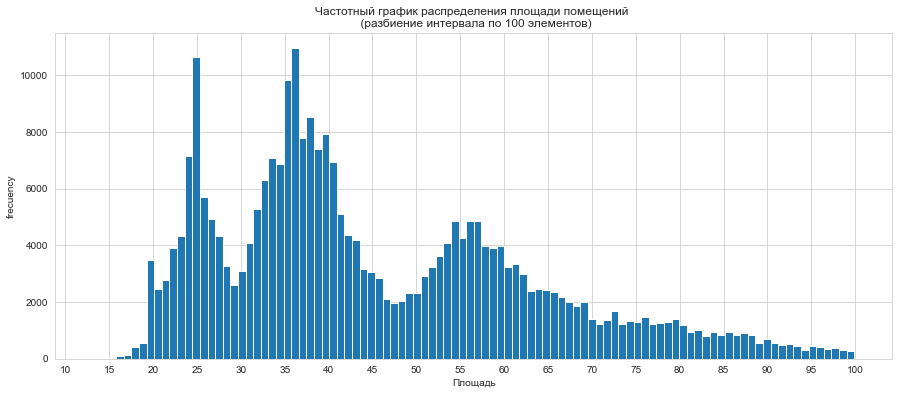

In [67]:
# Частотное распределение переменной Площадь (для выделения групп по площади):
fig = plt.figure(figsize = (15,6))
n, bins, patches = plt.hist(sel.loc[sel['Площадь'] < 100]['Площадь'], 100)
plt.xlabel('Площадь')
plt.ylabel('frecuency')
plt.title('Частотный график распределения площади помещений \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.locator_params(axis='x', nbins=20) # дополнительные метки по оси X
plt.show()

In [68]:
# Добавим группы по площади:
area_grades = ['до 25 кв.м', '26-40 кв.м', '41-55 кв.м', '56-70 кв.м','71-85 кв.м', '86-100 кв.м', 'св. 100 кв.м']
area_bins = [0, 25, 40, 55, 70, 85, 100, 700]
sel['Категория по площади'] = pd.cut(sel['Площадь'], bins = area_bins, labels = area_grades)
# sel[['Площадь', 'Категория по площади']].head(20)

In [69]:
# Продажи помещений в зависимости от площади:
area_year = sel.groupby(['Категория по площади', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})

area_rev = area_year.sort_values('Оценка выручки', ascending=False)
area_qua = area_year.sort_values('Кол-во помещений', ascending=False)
# area_year

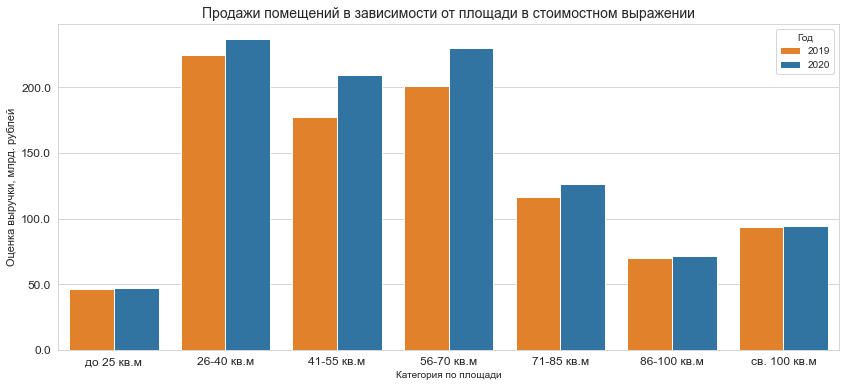

In [70]:
# Продажи помещений в стоимостном выражении:
drawbar('Категория по площади', 'Оценка выручки', 'Год', area_year, 'Продажи помещений в зависимости от площади в стоимостном выражении', 
        'Оценка выручки, млрд. рублей', billions)

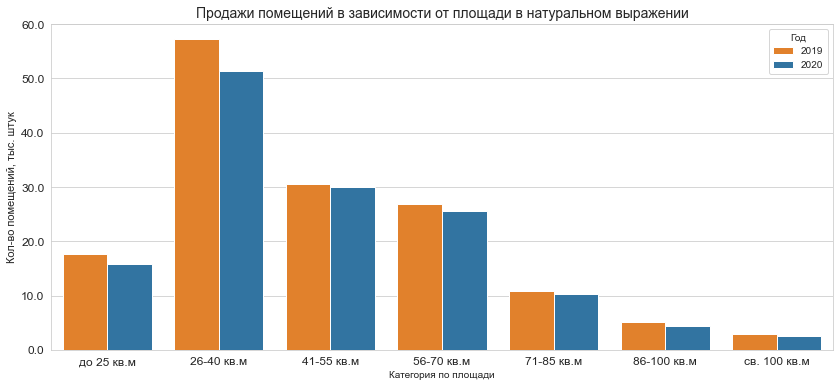

In [71]:
# Продажи помещений в натуральном выражении:
drawbar('Категория по площади', 'Кол-во помещений', 'Год', area_year, 'Продажи помещений в зависимости от площади в натуральном выражении', 
        'Кол-во помещений, тыс. штук', thousands)

#### Продажи помещений по наличию и виду обременения

In [72]:
# Продажи помещений в зависимости от площади:
encumbrance_year = sel.groupby(['Обременения', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})

encumbrance_rev = encumbrance_year.sort_values('Оценка выручки', ascending=False)
encumbrance_qua = encumbrance_year.sort_values(['Год', 'Кол-во помещений'], ascending=[False, False])

In [73]:
encumbrance_year

Обременения   Год  Оценка выручки  Кол-во помещений
0  военная ипотека  2019    5432323825.0              1128
1  военная ипотека  2020    2201257582.0               423
2            залог  2019   16125823485.0              1888
3            залог  2020   12064044412.0              1477
4          ипотека  2019  390037827360.0             65789
5          ипотека  2020  566580757654.0             80082
6      отсутствуют  2019  517995263187.0             82329
7      отсутствуют  2020  434819853570.0             57967

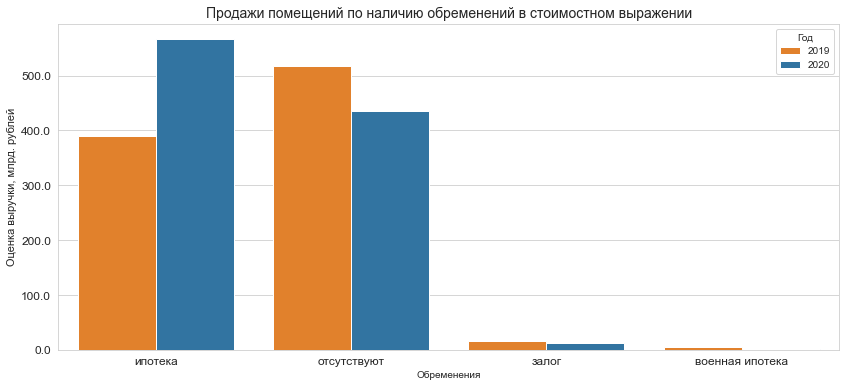

In [74]:
# Продажи помещений в стоимостном выражении:
drawbar('Обременения', 'Оценка выручки', 'Год', encumbrance_rev, 'Продажи помещений по наличию обременений в стоимостном выражении', 
        'Оценка выручки, млрд. рублей', billions)

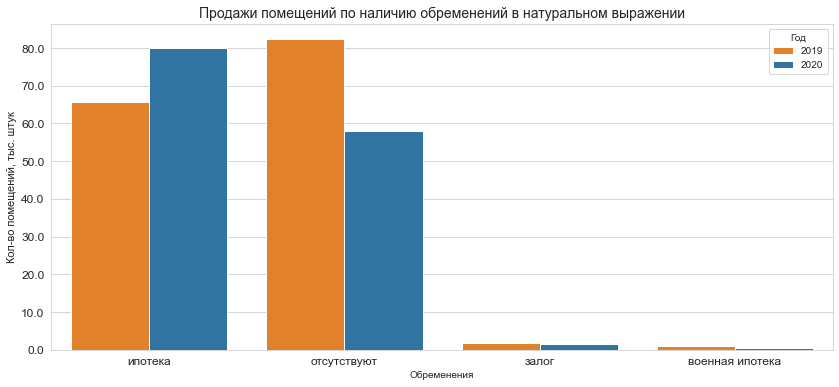

In [75]:
# Продажи помещений в натуральном выражении:
drawbar('Обременения', 'Кол-во помещений', 'Год', encumbrance_qua, 'Продажи помещений по наличию обременений в натуральном выражении', 
        'Кол-во помещений, тыс. штук', thousands)

In [76]:
# Посмотрим данные в процентном выражении:
# Агрегируем данные о сделках по виду обременения:
encumbrances = sel.pivot_table(index = 'Обременения', columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
encumbrances

Обременения Оценка выручки                Кол-во помещений       
Год                            2019           2020             2019   2020
0    военная ипотека   5432323825.0   2201257582.0             1128    423
1              залог  16125823485.0  12064044412.0             1888   1477
2            ипотека 390037827360.0 566580757654.0            65789  80082
3        отсутствуют 517995263187.0 434819853570.0            82329  57967

In [77]:
# Дополним сводную таблицу долями, в %:
encumbrances.insert(2, 
                    ('Оценка выручки',  '2019%'), 
                    (encumbrances[('Оценка выручки',  2019)] / encumbrances[('Оценка выручки',  2019)].sum())*100, 
                     True)
encumbrances.insert(4, 
                    ('Оценка выручки',  '2020%'), 
                    (encumbrances[('Оценка выручки',  2020)] / encumbrances[('Оценка выручки',  2020)].sum())*100, 
                     True)
encumbrances.insert(6, 
                    ('Кол-во помещений',  '2019%'), 
                    (encumbrances[('Кол-во помещений',  2019)] / encumbrances[('Кол-во помещений',  2019)].sum())*100, 
                     True)
encumbrances.insert(8, 
                    ('Кол-во помещений',  '2020%'), 
                    (encumbrances[('Кол-во помещений',  2020)] / encumbrances[('Кол-во помещений',  2020)].sum())*100, 
                     True)

In [78]:
# С участием ипотеки в 2020 г. продано 57,5% помещений, а в 2019 г. - 42,6%. Прирост: 14,9 п.п.
encumbrances

Обременения Оценка выручки                             \
Год                            2019 2019%           2020 2020%   
0    военная ипотека   5432323825.0   0.6   2201257582.0   0.2   
1              залог  16125823485.0   1.7  12064044412.0   1.2   
2            ипотека 390037827360.0  42.0 566580757654.0  55.8   
3        отсутствуют 517995263187.0  55.7 434819853570.0  42.8   

    Кол-во помещений                     
Год             2019 2019%   2020 2020%  
0               1128   0.7    423   0.3  
1               1888   1.2   1477   1.1  
2              65789  43.5  80082  57.2  
3              82329  54.5  57967  41.4

#### Ведущие залогодержатели

In [79]:
# Агрегируем данные о залогодержателях:
bank_year = sel.pivot_table(index = 'Залогодержатель', columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# bank_year

In [80]:
# Приведем к числовому виду переменные:
list_col = bank_year.columns.tolist()[1:]
bank_year[list_col] = bank_year[list_col].apply(pd.to_numeric)

In [81]:
# Получаем данные о выручке лидеров 2020 г. за 2019 и 2020 г.г. (среди лидеров - только банки):
top_bank2020 = bank_year.sort_values(('Оценка выручки', 2020), ascending = False).head(10)
top_bank2020

Залогодержатель Оценка выручки                Кол-во помещений  \
Год                                 2019           2020             2019   
367              СБЕРБАНК 111635862475.0 198558542895.0          21771.0   
97                    ВТБ 111370847753.0 133068635291.0          17269.0   
10             АЛЬФА-БАНК  26300029077.0  40735858563.0           3674.0   
311             ОТКРЫТИЕ   21453664126.0  30668321980.0           3419.0   
360        РОССЕЛЬХОЗБАНК  19659619092.0  23623493741.0           2844.0   
350         ПРОМСВЯЗЬБАНК  11791382349.0  20889358332.0           2186.0   
105           ДОМ.РФ БАНК  10564901070.0  20092050242.0           1560.0   
76   БАНК САНКТ-ПЕТЕРБУРГ  11801758849.0  18350827850.0           2897.0   
99            ГАЗПРОМБАНК  12182262246.0  12833451370.0           1411.0   
358               РОСБАНК   4522743514.0  11965792553.0            792.0   

             
Год    2020  
367 31915.0  
97  17066.0  
10   5070.0  
311  4012.0  
360  2884.0  
350  2810.0  
105  2319.0  
76   3613.0  
99   1158.0  
358  1757.0

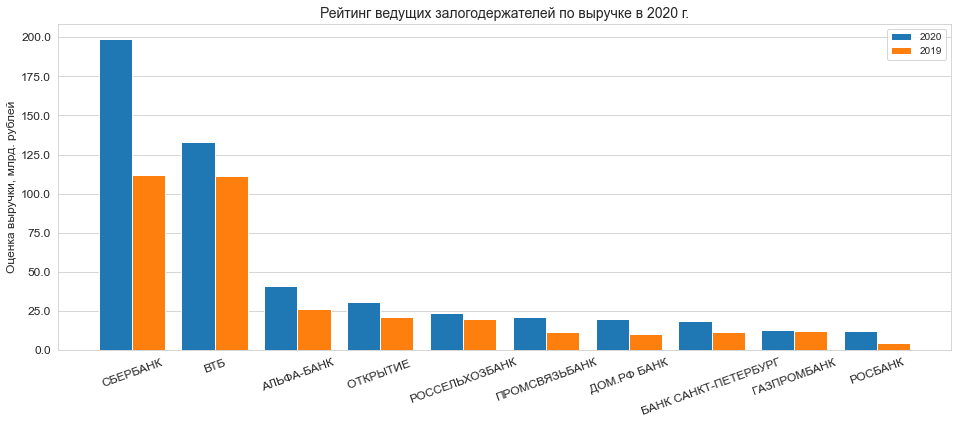

In [82]:
# Визуализируем эти данные:
drawbarmpl(top_bank2020, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions,
           'Рейтинг ведущих залогодержателей по выручке в 2020 г.', 'Оценка выручки, млрд. рублей', 20)

In [83]:
# Получаем данные о продажах лидеров 2020 г. за 2019 и 2020 г.г.:
top_bank2020_ = bank_year.sort_values(('Кол-во помещений', 2020), ascending = False).head(10)
top_bank2020_

Залогодержатель Оценка выручки                Кол-во помещений  \
Год                                 2019           2020             2019   
367              СБЕРБАНК 111635862475.0 198558542895.0          21771.0   
97                    ВТБ 111370847753.0 133068635291.0          17269.0   
10             АЛЬФА-БАНК  26300029077.0  40735858563.0           3674.0   
311             ОТКРЫТИЕ   21453664126.0  30668321980.0           3419.0   
76   БАНК САНКТ-ПЕТЕРБУРГ  11801758849.0  18350827850.0           2897.0   
360        РОССЕЛЬХОЗБАНК  19659619092.0  23623493741.0           2844.0   
350         ПРОМСВЯЗЬБАНК  11791382349.0  20889358332.0           2186.0   
105           ДОМ.РФ БАНК  10564901070.0  20092050242.0           1560.0   
358               РОСБАНК   4522743514.0  11965792553.0            792.0   
99            ГАЗПРОМБАНК  12182262246.0  12833451370.0           1411.0   

             
Год    2020  
367 31915.0  
97  17066.0  
10   5070.0  
311  4012.0  
76   3613.0  
360  2884.0  
350  2810.0  
105  2319.0  
358  1757.0  
99   1158.0

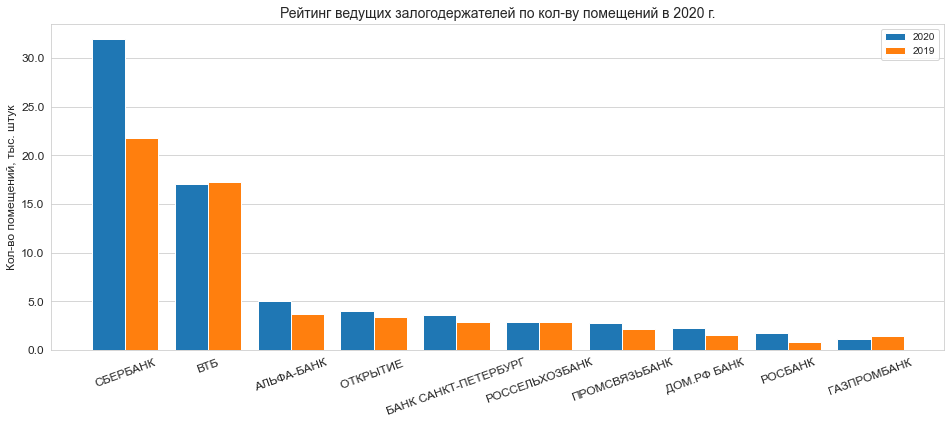

In [84]:
# Визуализируем эти данные:
drawbarmpl(top_bank2020_, 'Залогодержатель', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands,
           'Рейтинг ведущих залогодержателей по кол-ву помещений в 2020 г.', 'Кол-во помещений, тыс. штук', 20)

#### Ведущие застройщики

In [85]:
# Агрегируем данные о продажах застройщиков:
dev_year = sel.pivot_table(index = 'Застройщик ЖК', columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# dev_year

In [86]:
list_col = dev_year.columns.tolist()[1:]

In [87]:
# Приведем к числовому виду переменные:
dev_year[list_col] = dev_year[list_col].apply(pd.to_numeric)

In [88]:
# Получаем данные о продажах лидеров 2020 г. за 2019 и 2020 г.г.:
top_dev2020 = dev_year.sort_values(('Оценка выручки', 2020), ascending = False).head(10)
top_dev2020

Застройщик ЖК Оценка выручки                Кол-во помещений        
Год                          2019           2020             2019    2020
260            ПИК  95014396829.0 117411090469.0          13358.0 14243.0
54      Setl Group  67156243472.0  51936824766.0          14802.0 11055.0
206            ЛСР  36238329126.0  39944122607.0           6137.0  6281.0
154       Донстрой  18969517924.0  38738060977.0           1209.0  2524.0
323        Самолет  26536831414.0  37126861605.0           5736.0  6460.0
22          Ingrad  28632237073.0  35931578020.0           3837.0  3725.0
34        MR Group  20383748988.0  34778026176.0           2202.0  2762.0
140        Гранель  25275216357.0  31126385682.0           6839.0  6965.0
389            ФСК  25749538228.0  26965402543.0           4427.0  3920.0
413  Эталон-инвест  25394243584.0  21939053035.0           3313.0  2402.0

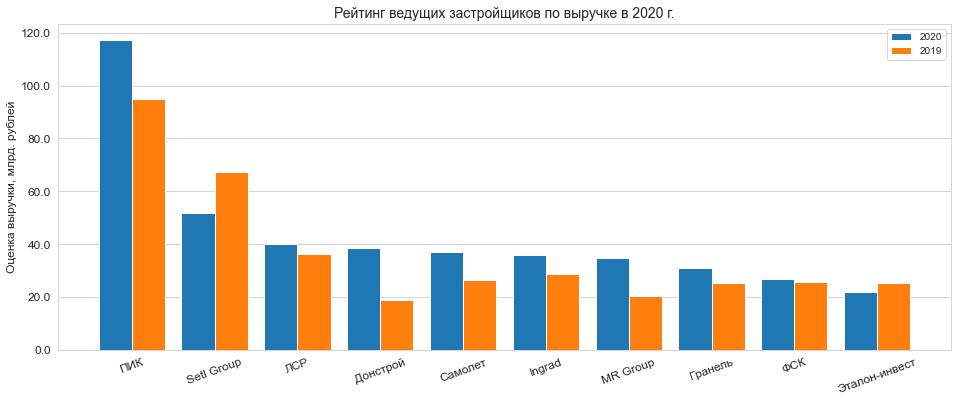

In [89]:
# Визуализируем эти данные:
drawbarmpl(top_dev2020, 'Застройщик ЖК', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions,
           'Рейтинг ведущих застройщиков по выручке в 2020 г.', 'Оценка выручки, млрд. рублей', 20)

In [90]:
# Получаем данные о продажах лидеров 2020 г. за 2019 и 2020 г.г.:
top_dev2020_ = dev_year.sort_values(('Кол-во помещений', 2020), ascending = False).head(10)
top_dev2020_

Застройщик ЖК Оценка выручки                Кол-во помещений  \
Год                                  2019           2020             2019   
260                    ПИК  95014396829.0 117411090469.0          13358.0   
54              Setl Group  67156243472.0  51936824766.0          14802.0   
140                Гранель  25275216357.0  31126385682.0           6839.0   
323                Самолет  26536831414.0  37126861605.0           5736.0   
206                    ЛСР  36238329126.0  39944122607.0           6137.0   
389                    ФСК  25749538228.0  26965402543.0           4427.0   
22                  Ingrad  28632237073.0  35931578020.0           3837.0   
134  Главстрой Девелопмент  14784268478.0  20311968883.0           3393.0   
235           Мортон (ПИК)  21186427507.0  20334839272.0           3452.0   
34                MR Group  20383748988.0  34778026176.0           2202.0   

             
Год    2020  
260 14243.0  
54  11055.0  
140  6965.0  
323  6460.0  
206  6281.0  
389  3920.0  
22   3725.0  
134  3695.0  
235  3312.0  
34   2762.0

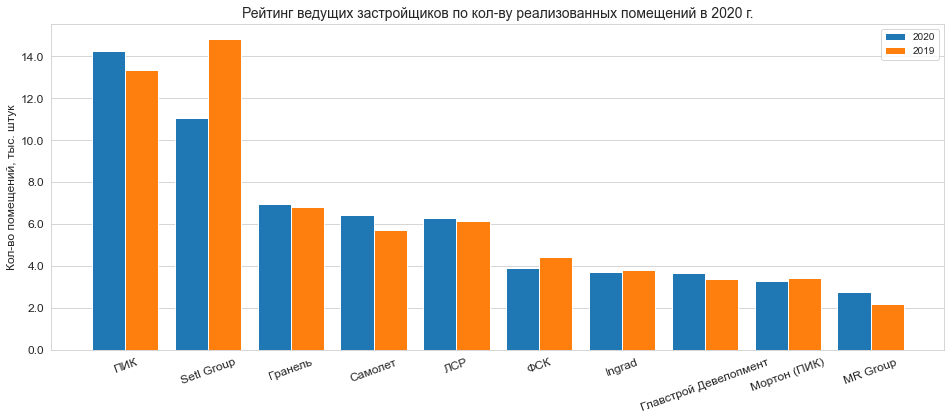

In [91]:
# Визуализируем эти данные:
drawbarmpl(top_dev2020_, 'Застройщик ЖК', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands,
           'Рейтинг ведущих застройщиков по кол-ву реализованных помещений в 2020 г.', 'Кол-во помещений, тыс. штук', 20)

In [92]:
# Как обновился состав лидеров?
top10dev2020 = top_dev2020['Застройщик ЖК'].tolist()
top10dev2020

['ПИК',
 'Setl Group',
 'ЛСР',
 'Донстрой',
 'Самолет',
 'Ingrad',
 'MR Group',
 'Гранель',
 'ФСК',
 'Эталон-инвест']

In [93]:
top_dev2019 = dev_year.sort_values(('Оценка выручки', 2019), ascending = False).head(10)
top10dev2019 = top_dev2019['Застройщик ЖК'].tolist()
top10dev2019

['ПИК',
 'Setl Group',
 'ЛСР',
 'Ingrad',
 'А101',
 'Самолет',
 'ФСК',
 'Эталон-инвест',
 'Гранель',
 'Capital Group']

In [94]:
# Застройщики, вошедшие в топ10 и в 2020 г., и в 2019 г.:
top10dev = list(set(top10dev2020) & set(top10dev2019))
top10dev

['ПИК',
 'Гранель',
 'Самолет',
 'ФСК',
 'Setl Group',
 'ЛСР',
 'Ingrad',
 'Эталон-инвест']

In [95]:
# Застройщики, вошедшие в топ 2020 г., но отсутствовашие в нём в 2019 г:
new_top10dev = list(set(top10dev2020) - set(top10dev2019))
new_top10dev

['MR Group', 'Донстрой']

In [96]:
# Показатели концентрации рынка:
# Выручка 10 ведущих застройщиков 2020 г.:
revenue_top2020 = top_dev2020[('Оценка выручки', 2020)].sum()
# Доля в выручке 2020 г.:
share_top2020 = revenue_top2020 / revenue2020

# Выручка 10 ведущих застройщиков 2019 г.:
revenue_top2019 = top_dev2019[('Оценка выручки', 2019)].sum()
# Доля в выручке 2019 г.:
share_top2019 = revenue_top2019 / revenue2019

# Выручка 10 ведущих застройщиков 2019-2020 г.г.:
revenue_dev = sel.groupby(['Застройщик ЖК']).agg({'Оценка цены': 'sum', 'Площадь': 'count'})
revenue_topdev = revenue_dev.sort_values('Оценка цены', ascending = False).head(10)['Оценка цены'].sum()
share_topdev = revenue_topdev / revenue

print(f'Доля 10-ти ведущих застройщиков 2020 г. в продажах за год: {(share_top2020*100):1.1f} %')
print(f'Доля 10-ти ведущих застройщиков 2019 г. в продажах за год: {(share_top2019*100):1.1f} %')
print(f'Доля 10-ти ведущих застройщиков 2019-2020 г.г. в продажах за период: {(share_topdev*100):1.1f} %')

Доля 10-ти ведущих застройщиков 2020 г. в продажах за год: 42.9 %
Доля 10-ти ведущих застройщиков 2019 г. в продажах за год: 40.8 %
Доля 10-ти ведущих застройщиков 2019-2020 г.г. в продажах за период: 41.4 %


In [97]:
# Доля ипотечных сделок у лидеров рынка в 2019-2020 г.г.: 
sel_top10dev2020 = sel.loc[sel['Застройщик ЖК'].isin(top10dev2020)]

In [98]:
top10_mg = sel_top10dev2020.pivot_table(index = 'Застройщик ЖК', columns = ['Год', 'Ипотека'], values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='').reset_index()\
                        .sort_values(('Оценка цены', 2020,  1), ascending=False)

In [99]:
top10_mg['Доля ип.сделок 2020'] = 100*top10_mg[('Оценка цены', 2020,  1)]\
            /(top10_mg[('Оценка цены', 2020,  1)] + top10_mg[('Оценка цены', 2020,  0)])
top10_mg['Доля ип.сделок 2019'] = 100*top10_mg[('Оценка цены', 2019,  1)]\
            /(top10_mg[('Оценка цены', 2019,  1)] + top10_mg[('Оценка цены', 2019,  0)])

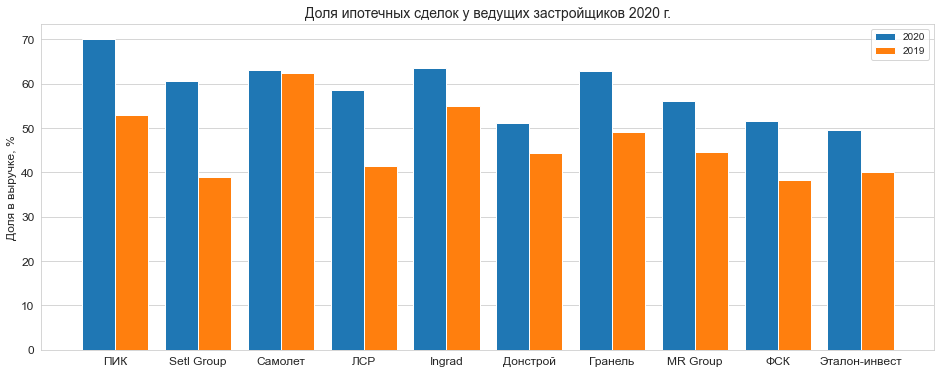

In [100]:
# Визуализируем:
drawbarmpl(top10_mg, ('Застройщик ЖК','',''), ('Доля ип.сделок 2020','',''), ('Доля ип.сделок 2019','',''), things,
           'Доля ипотечных сделок у ведущих застройщиков 2020 г.', 'Доля в выручке, %', 0)

#### Лидеры по продажам среди ЖК

In [101]:
# Топ ЖК:
compl = sel.groupby(['ЖК рус', 'класс', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})

# compl.head()

In [102]:
compl_rev = compl.sort_values('Оценка выручки', ascending = False)
compl_qua = compl.sort_values('Кол-во помещений', ascending = False)

> #### эконом-класс

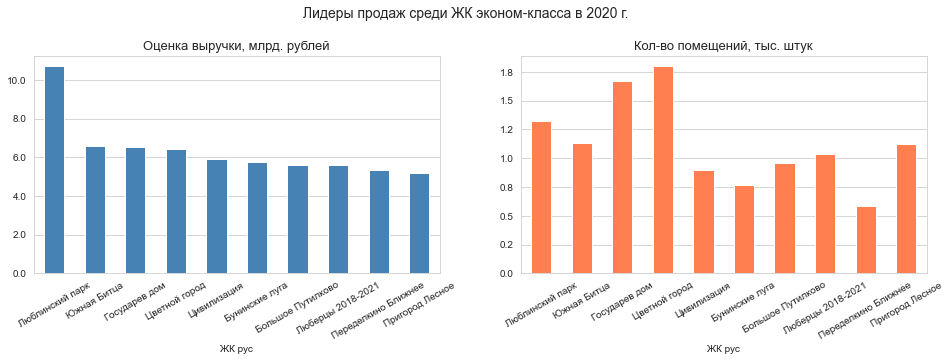

In [103]:
top10ec2020 = compl_rev.loc[(compl_rev['Год'] == 2020) & ((compl_rev['класс'] == 'эконом') | (compl_rev['класс'] == 'эконом (панель)'))].head(10)
draw2plot(top10ec2020, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК эконом-класса в 2020 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 30)

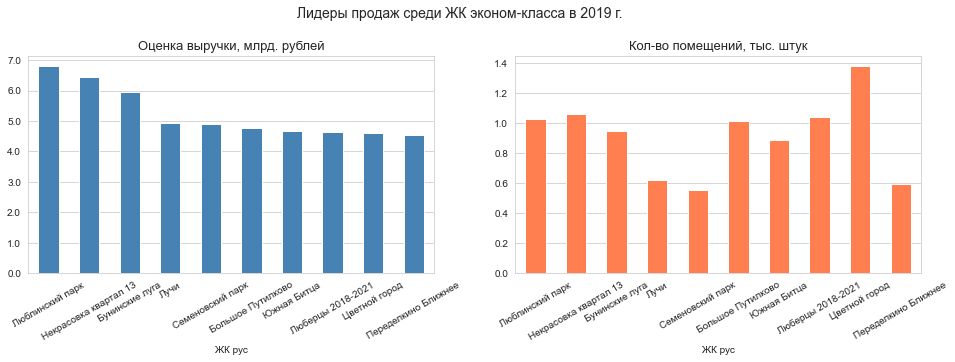

In [104]:
top10ec2019 = compl_rev.loc[(compl_rev['Год'] == 2019) & ((compl_rev['класс'] == 'эконом') | (compl_rev['класс'] == 'эконом (панель)'))].head(10)
draw2plot(top10ec2019, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК эконом-класса в 2019 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 30)

> #### комфорт-класс

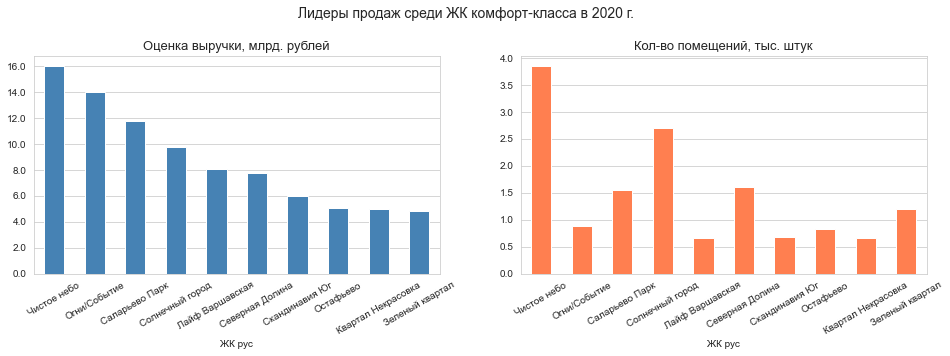

In [105]:
top10com2020 = compl_rev.loc[(compl_rev['Год'] == 2020) & (compl_rev['класс'] == 'комфорт')].head(10)
draw2plot(top10com2020, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК комфорт-класса в 2020 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 30)

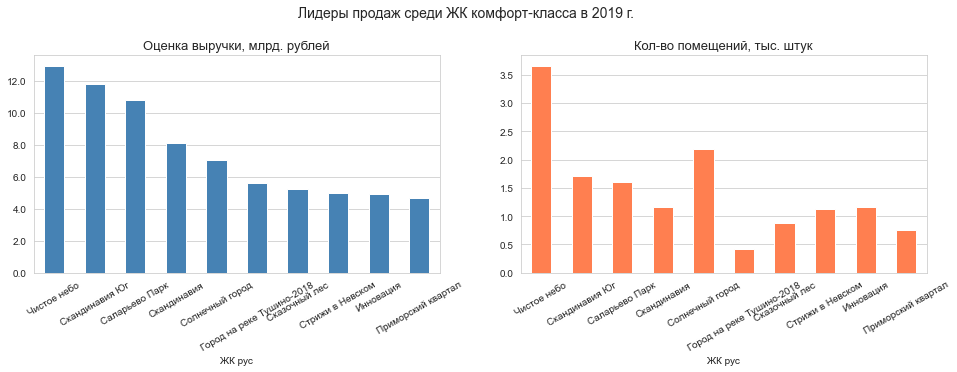

In [106]:
top10com2019 = compl_rev.loc[(compl_rev['Год'] == 2019) & (compl_rev['класс'] == 'комфорт')].head(10)
draw2plot(top10com2019, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК комфорт-класса в 2019 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 30)

> #### бизнес-класс

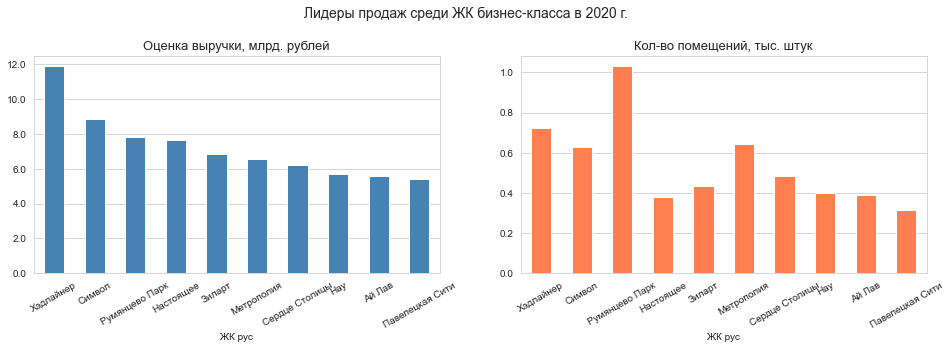

In [107]:
top10bus2020 = compl_rev.loc[(compl_rev['Год'] == 2020) & (compl_rev['класс'] == 'бизнес')].head(10)
draw2plot(top10bus2020, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК бизнес-класса в 2020 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 30)

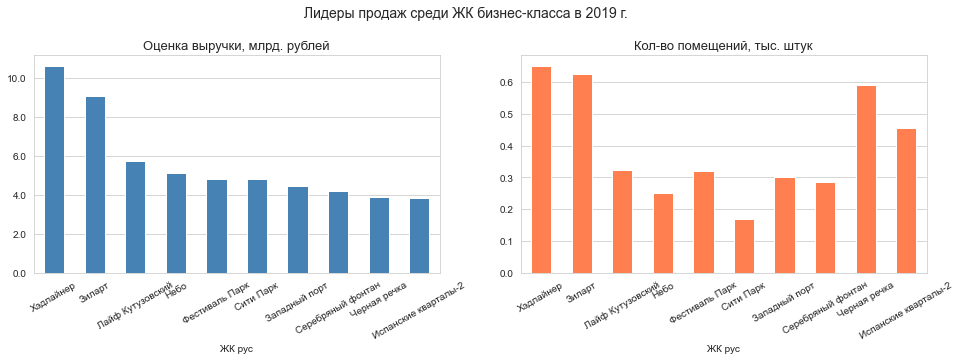

In [108]:
top10bus2019 = compl_rev.loc[(compl_rev['Год'] == 2019) & (compl_rev['класс'] == 'бизнес')].head(10)
draw2plot(top10bus2019, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК бизнес-класса в 2019 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, тыс. штук',
         billions, thousands, 30)

> #### премиум-класс

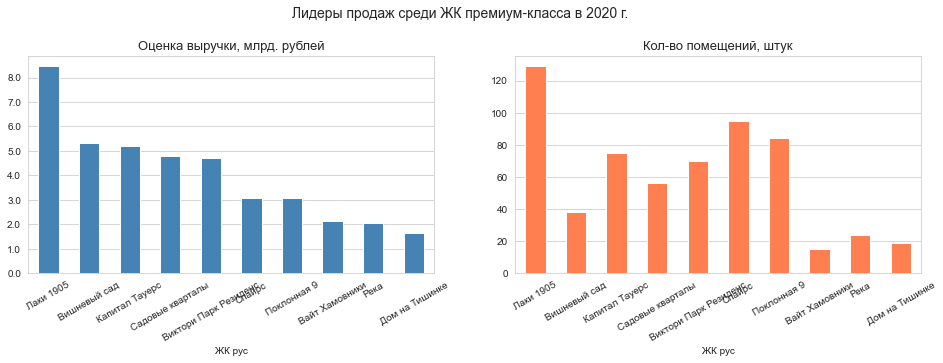

In [109]:
top10pr2020 = compl_rev.loc[(compl_rev['Год'] == 2020) & (compl_rev['класс'] == 'премиум')].head(10)
draw2plot(top10pr2020, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК премиум-класса в 2020 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, штук',
         billions, things, 30)

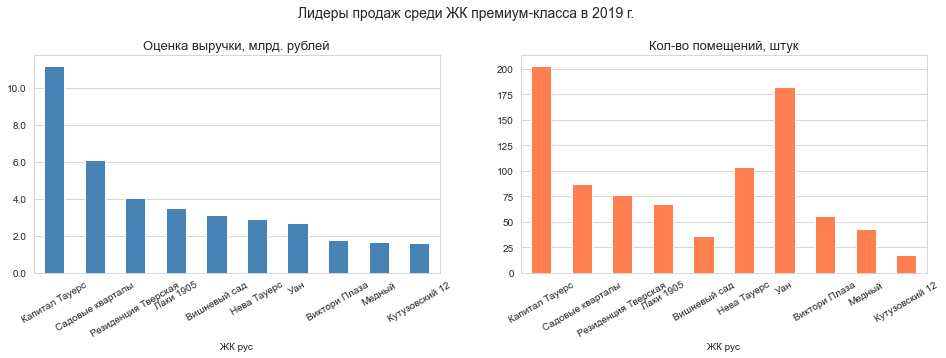

In [110]:
top10pr2019 = compl_rev.loc[(compl_rev['Год'] == 2019) & (compl_rev['класс'] == 'премиум')].head(10)
draw2plot(top10pr2019, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК премиум-класса в 2019 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, штук',
         billions, things, 30)

> #### делюкс-класс

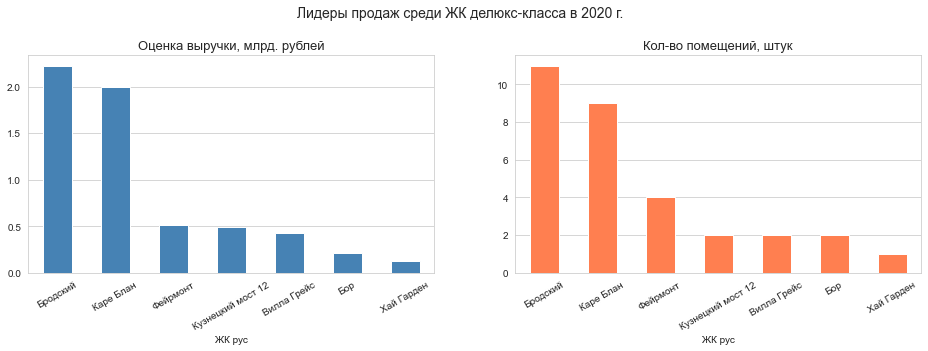

In [111]:
top10dl2020 = compl_rev.loc[(compl_rev['Год'] == 2020) & (compl_rev['класс'] == 'де-люкс')].head(10)
draw2plot(top10dl2020, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК делюкс-класса в 2020 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, штук',
         billions, things, 30)

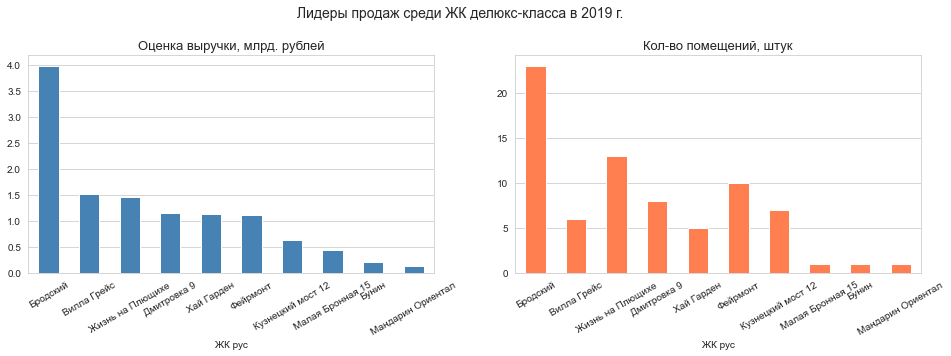

In [112]:
top10dl2019 = compl_rev.loc[(compl_rev['Год'] == 2019) & (compl_rev['класс'] == 'де-люкс')].head(10)
draw2plot(top10dl2019, 'bar', 'Оценка выручки', 'ЖК рус', 'Кол-во помещений', 
          'Лидеры продаж среди ЖК делюкс-класса в 2019 г.', 
          'Оценка выручки, млрд. рублей', 'Кол-во помещений, штук',
         billions, things, 30)

#### Продажи по регионам

In [113]:
# Продажи по субъектам и территориям:
region_year = sel.groupby(['Регион', 'Год']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})
region_rev = region_year.sort_values('Оценка выручки', ascending=False)
region_qua = region_year.sort_values('Кол-во помещений', ascending=False)

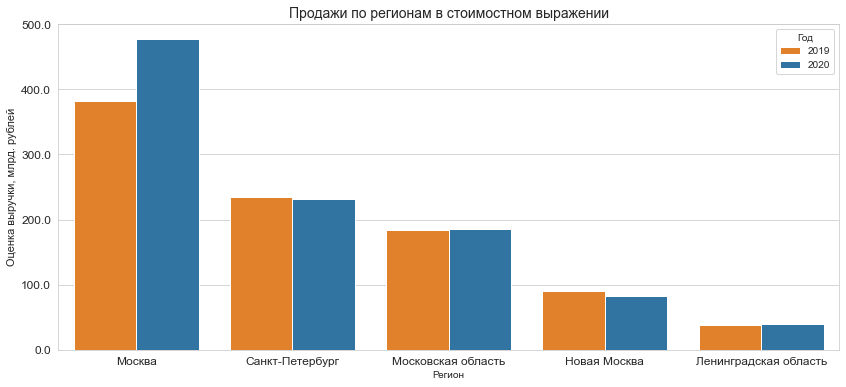

In [114]:
# Продажи по регионам в стоимостном выражении:
drawbar('Регион', 'Оценка выручки', 'Год', region_rev, 'Продажи по регионам в стоимостном выражении', 
        'Оценка выручки, млрд. рублей', billions)

In [115]:
# В табличном виде данные о продажах по регионам:
regions = sel.pivot_table(index = 'Регион', columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()\
                    .sort_values(('Оценка выручки', 2020), ascending = False)
# regions

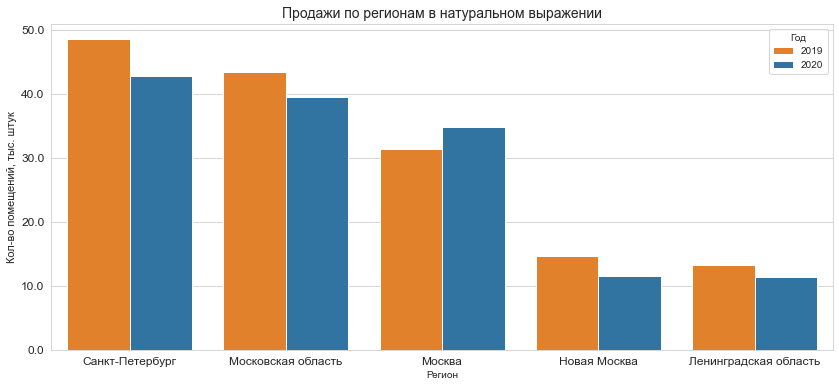

In [116]:
# Продажи по регионам в натуральном выражении:
drawbar('Регион', 'Кол-во помещений', 'Год', region_qua, 'Продажи по регионам в натуральном выражении', 
        'Кол-во помещений, тыс. штук', thousands)

#### Продажи по территориям

In [117]:
# Продажи по адм.-территориальным единицам субъектов:
atd_year = sel.pivot_table(index = ['Регион', 'АТД'], columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# atd_year

list_col = atd_year.columns.tolist()[2:]

# Приведем к числовому виду переменные:
atd_year[list_col] = atd_year[list_col].apply(pd.to_numeric)

In [118]:
# Продажи по округам (направлениям) субъектов:
distr_year  = sel.pivot_table(index = ['Регион', 'Округ Направление'], columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# distr_year

In [119]:
# Продажи по выделенным зонам субъектов:
zone_year = sel.pivot_table(index = ['Регион', 'Зона'], columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# zone_year

In [120]:
# Продажи по муниципальным образованиям:
mun_year = sel.pivot_table(index = ['Регион', 'Район Город'], columns = 'Год', values = ['Оценка цены', 'Площадь'],
                    aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# mun_year
list_col = mun_year.columns.tolist()[2:]

# Приведем к числовому виду переменные:
mun_year[list_col] = mun_year[list_col].apply(pd.to_numeric)

> #### Москва и Новая Москва

#### По адм.-территориальным единицам

In [121]:
# Отбираем данные для региона:
atd_msk_rev = atd_year.loc[(atd_year['Регион'] == 'Москва') | (atd_year['Регион'] == 'Новая Москва')]\
        .sort_values(('Оценка выручки', 2020), ascending = False)
atd_msk_qua = atd_year.loc[(atd_year['Регион'] == 'Москва') | (atd_year['Регион'] == 'Новая Москва')]\
        .sort_values(('Кол-во помещений', 2020), ascending = False)

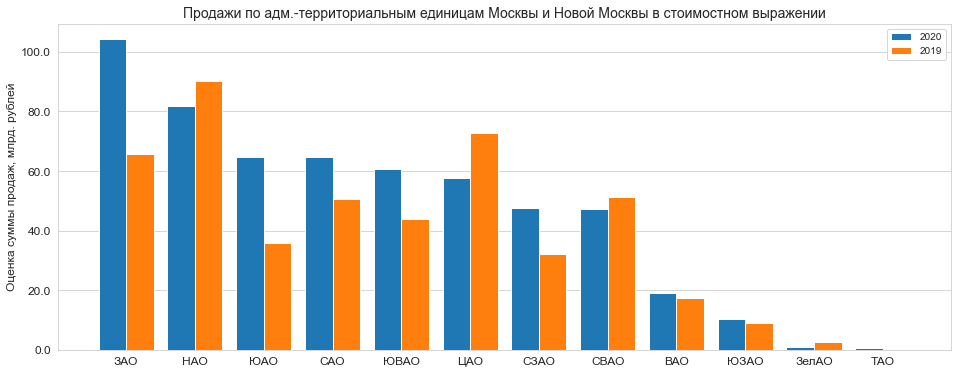

In [122]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(atd_msk_rev, 'АТД', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по адм.-территориальным единицам Москвы и Новой Москвы в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 0)

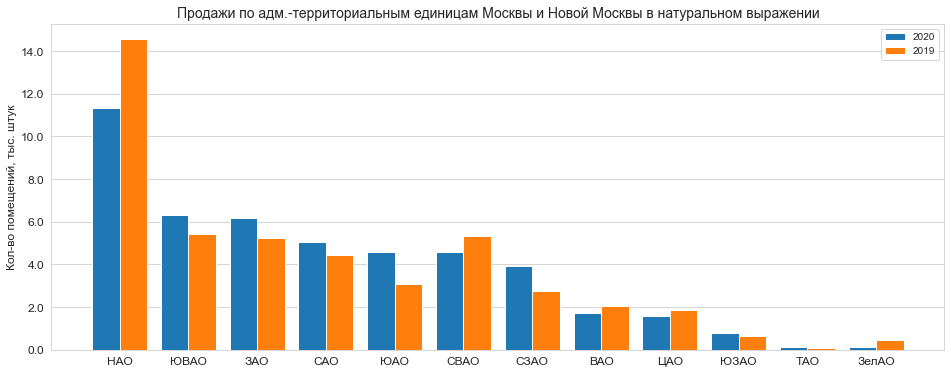

In [123]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(atd_msk_qua, 'АТД', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по адм.-территориальным единицам Москвы и Новой Москвы в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 0)

#### По выделенным зонам

In [124]:
# Отбираем данные для региона:
zone_msk_rev = zone_year.loc[(zone_year['Регион'] == 'Москва') | (zone_year['Регион'] == 'Новая Москва')]\
        .sort_values(('Оценка выручки', 2020), ascending = False)
zone_msk_qua = zone_year.loc[(zone_year['Регион'] == 'Москва') | (zone_year['Регион'] == 'Новая Москва')]\
        .sort_values(('Кол-во помещений', 2020), ascending = False)

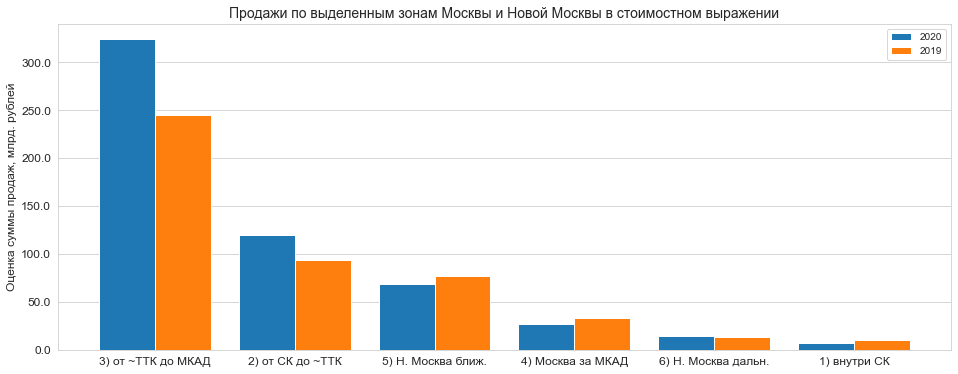

In [125]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(zone_msk_rev, 'Зона', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по выделенным зонам Москвы и Новой Москвы в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 0)

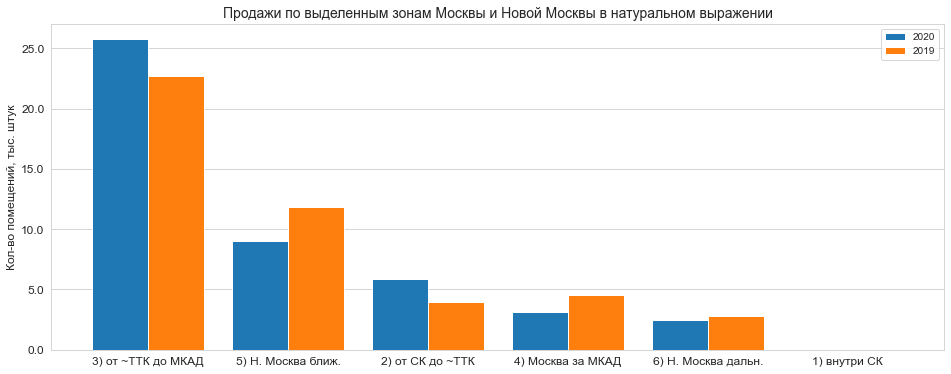

In [126]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(zone_msk_qua, 'Зона', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по выделенным зонам Москвы и Новой Москвы в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 0)

#### По муниципальным образованиям

In [127]:
# Отбираем данные для региона:
mun_msk_rev = mun_year.loc[(mun_year['Регион'] == 'Москва') | (mun_year['Регион'] == 'Новая Москва')]\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
mun_msk_qua = mun_year.loc[(mun_year['Регион'] == 'Москва') | (mun_year['Регион'] == 'Новая Москва')]\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

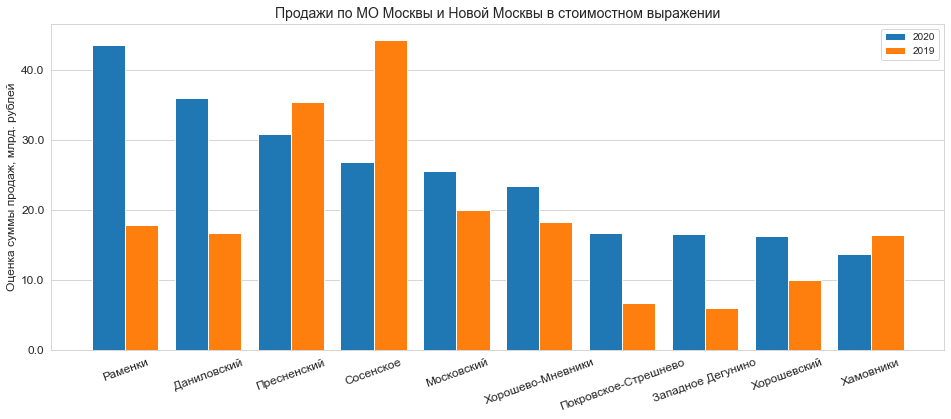

In [128]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(mun_msk_rev, 'Район Город', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по МО Москвы и Новой Москвы в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

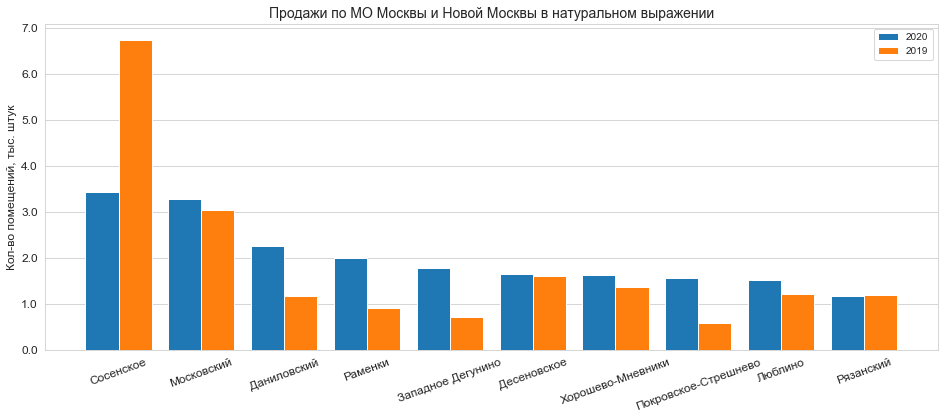

In [129]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(mun_msk_qua, 'Район Город', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по МО Москвы и Новой Москвы в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

> #### Московская область

#### По адм.-территориальным единицам

In [130]:
# Отбираем данные для региона:
atd_mo_rev = atd_year.loc[atd_year['Регион'] == 'Московская область']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
atd_mo_qua = atd_year.loc[atd_year['Регион'] == 'Московская область']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

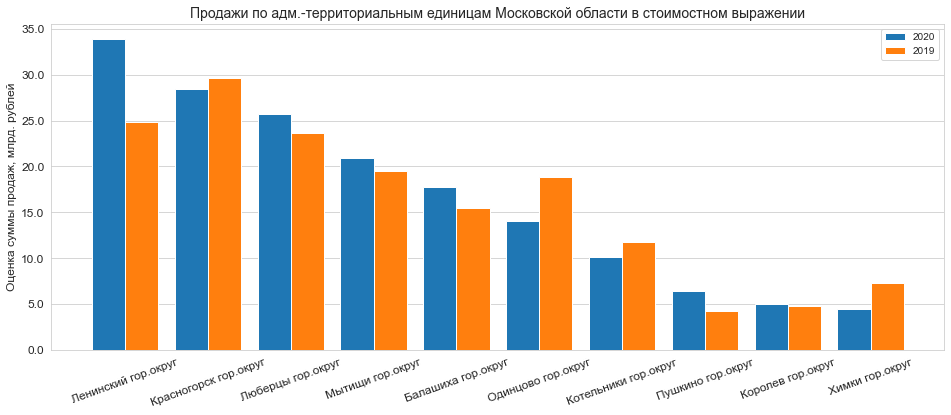

In [131]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(atd_mo_rev, 'АТД', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по адм.-территориальным единицам Московской области в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

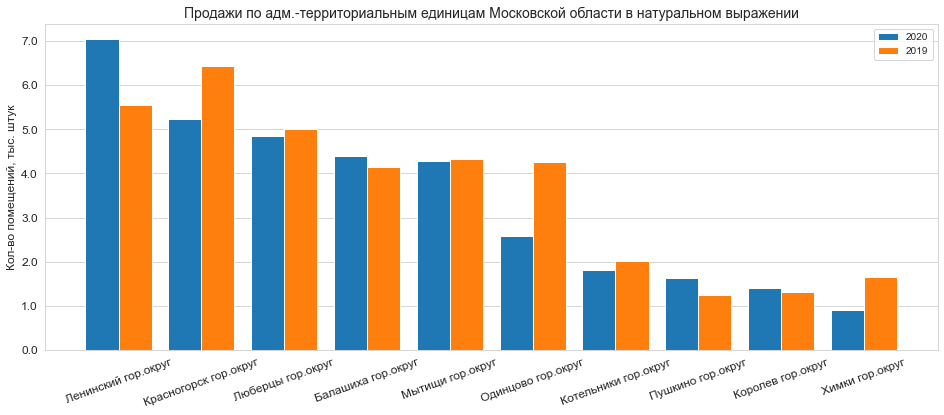

In [132]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(atd_mo_qua, 'АТД', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по адм.-территориальным единицам Московской области в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

#### По выделенным зонам

In [133]:
# Отбираем данные для региона:
zone_mo_rev = zone_year.loc[zone_year['Регион'] == 'Московская область']\
        .sort_values(('Оценка выручки', 2020), ascending = False)
zone_mo_qua = zone_year.loc[zone_year['Регион'] == 'Московская область']\
        .sort_values(('Кол-во помещений', 2020), ascending = False)

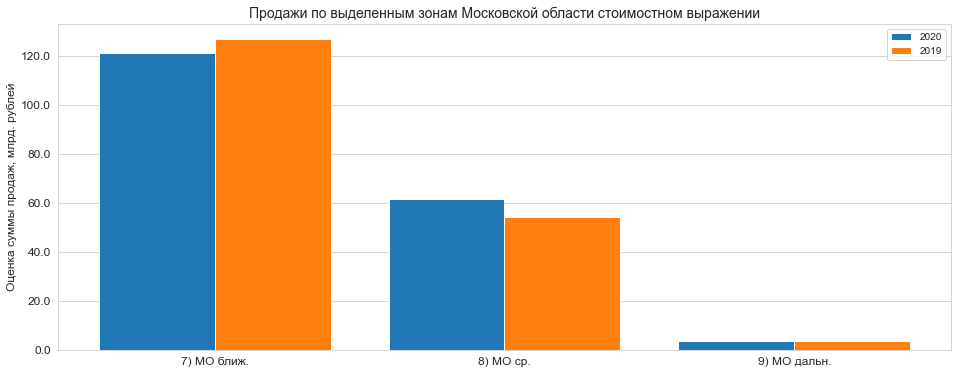

In [134]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(zone_mo_rev, 'Зона', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по выделенным зонам Московской области стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 0)

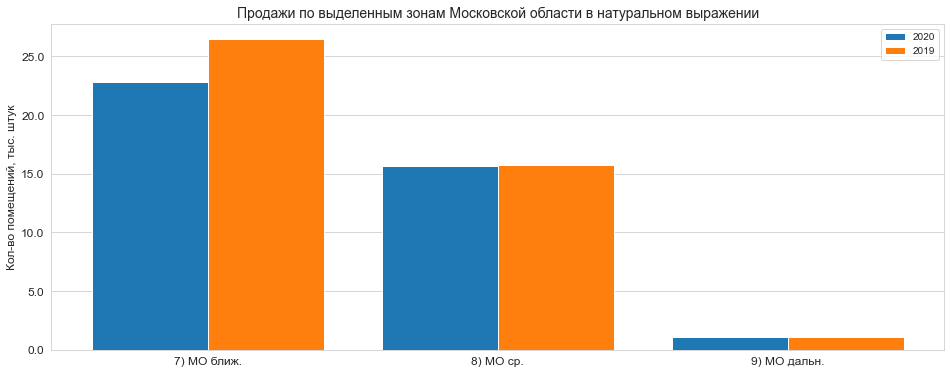

In [135]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(zone_mo_qua, 'Зона', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по выделенным зонам Московской области в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 0)

#### По муниципальным образованиям

In [136]:
# Отбираем данные для региона:
mun_mo_rev = mun_year.loc[mun_year['Регион'] == 'Московская область']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
mun_mo_qua = mun_year.loc[mun_year['Регион'] == 'Московская область']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

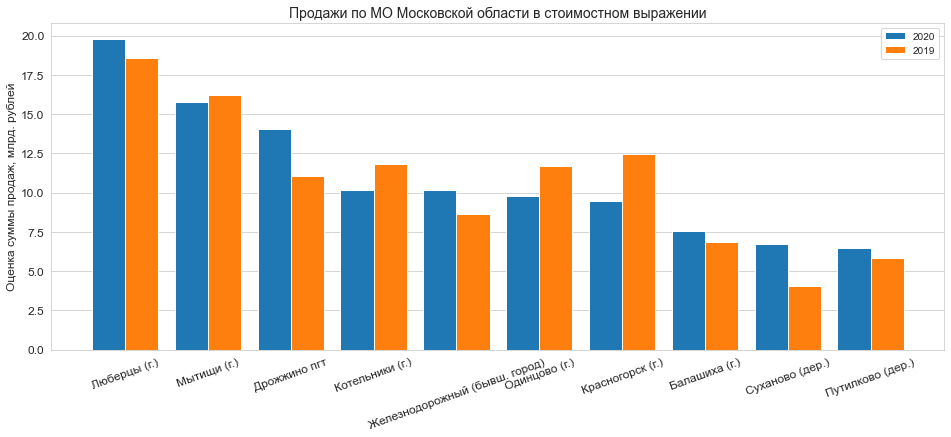

In [137]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(mun_mo_rev, 'Район Город', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по МО Московской области в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

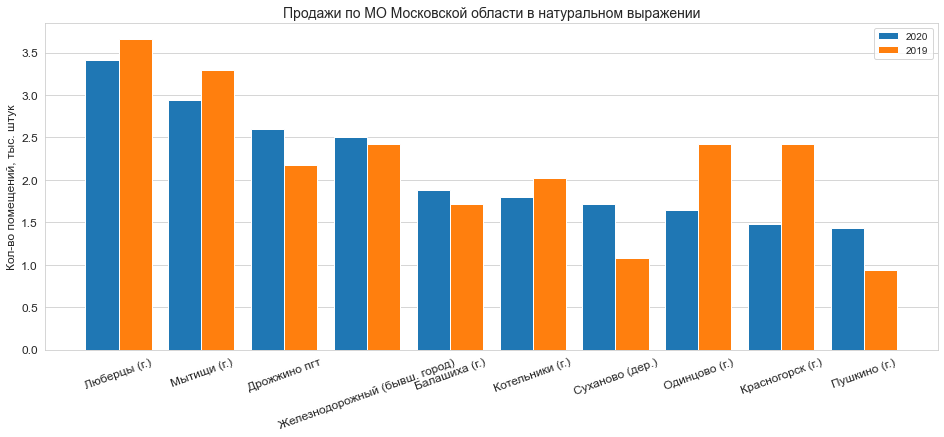

In [138]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(mun_mo_qua, 'Район Город', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по МО Московской области в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

#### По направлениям (округам)

In [139]:
# Отбираем данные для региона:
distr_mo_rev = distr_year.loc[distr_year['Регион'] == 'Московская область']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
distr_mo_qua = distr_year.loc[distr_year['Регион'] == 'Московская область']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

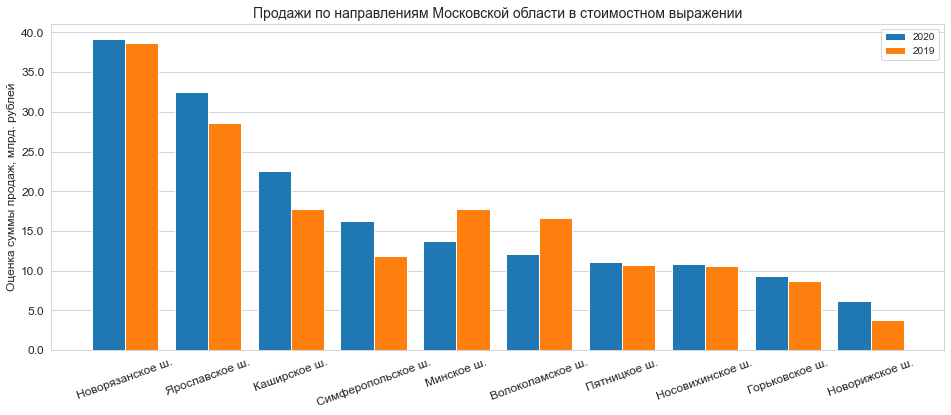

In [140]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(distr_mo_rev, 'Округ Направление', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по направлениям Московской области в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

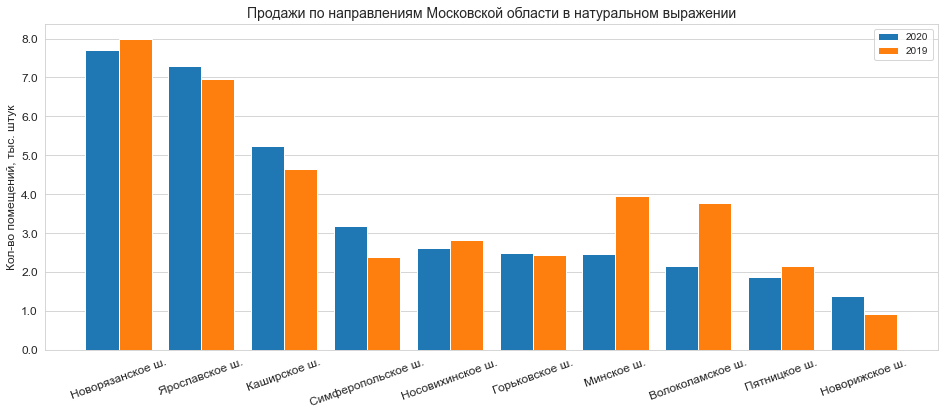

In [141]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(distr_mo_qua, 'Округ Направление', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по направлениям Московской области в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

> #### Санкт-Петербург

#### По адм.-территориальным единицам (районам)

In [142]:
# Отбираем данные для региона:
atd_spb_rev = atd_year.loc[atd_year['Регион'] == 'Санкт-Петербург']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
atd_spb_qua = atd_year.loc[atd_year['Регион'] == 'Санкт-Петербург']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

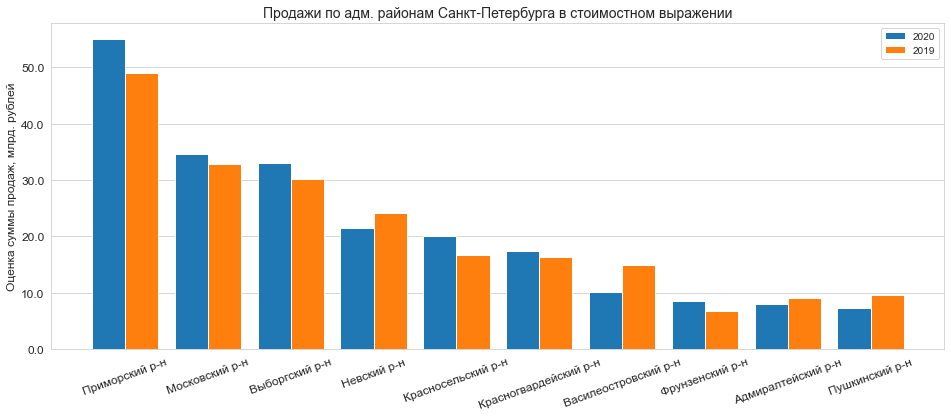

In [143]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(atd_spb_rev, 'АТД', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по адм. районам Санкт-Петербурга в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

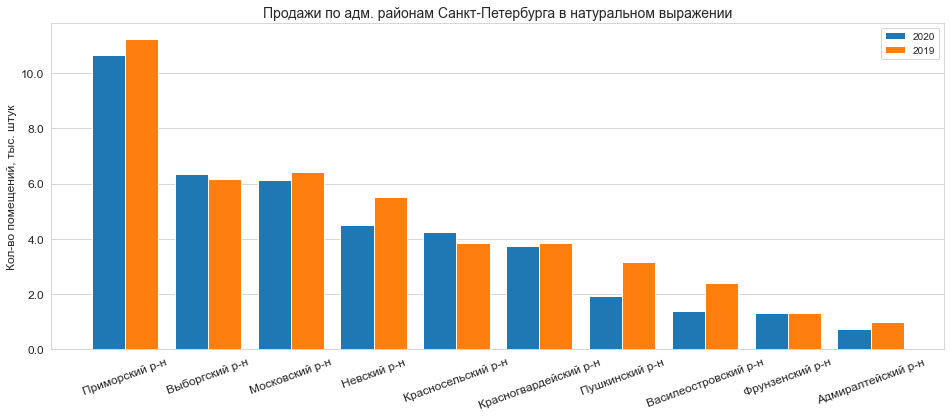

In [144]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(atd_spb_qua, 'АТД', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по адм. районам Санкт-Петербурга в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

#### По выделенным зонам

In [145]:
# Отбираем данные для региона:
zone_spb_rev = zone_year.loc[zone_year['Регион'] == 'Санкт-Петербург']\
        .sort_values(('Оценка выручки', 2020), ascending = False)
zone_spb_qua = zone_year.loc[zone_year['Регион'] == 'Санкт-Петербург']\
        .sort_values(('Кол-во помещений', 2020), ascending = False)

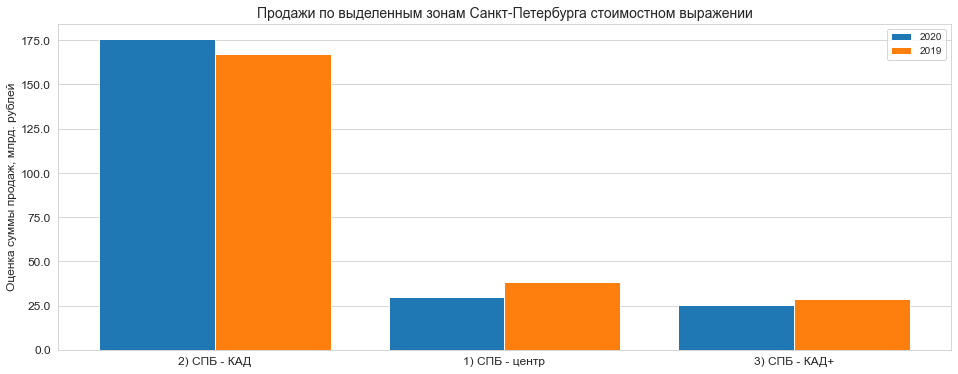

In [146]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(zone_spb_rev, 'Зона', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по выделенным зонам Санкт-Петербурга стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 0)

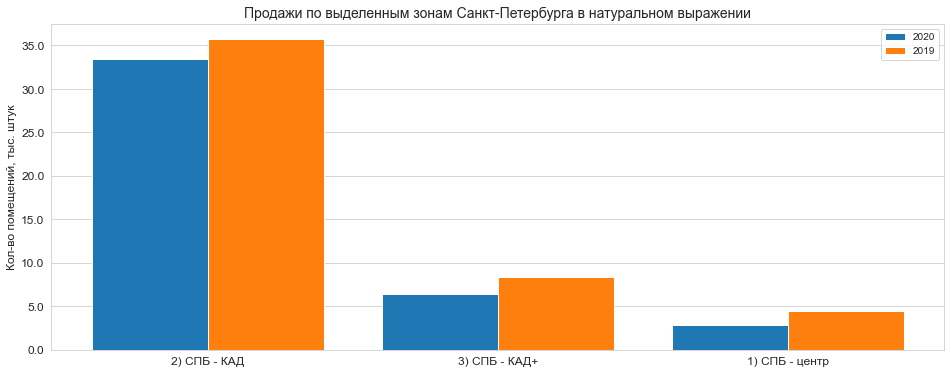

In [147]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(zone_spb_qua, 'Зона', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по выделенным зонам Санкт-Петербурга в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 0)

#### По муниципальным образованиям

In [148]:
# Отбираем данные для региона:
mun_spb_rev = mun_year.loc[mun_year['Регион'] == 'Санкт-Петербург']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
mun_spb_qua = mun_year.loc[mun_year['Регион'] == 'Санкт-Петербург']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

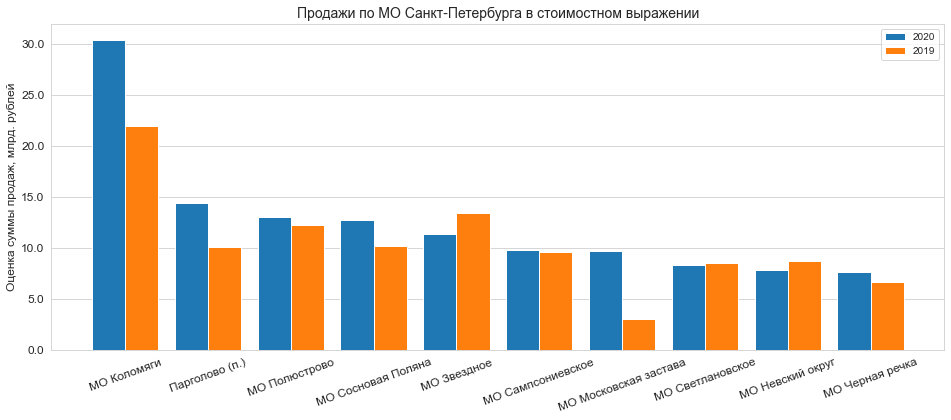

In [149]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(mun_spb_rev, 'Район Город', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по МО Санкт-Петербурга в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

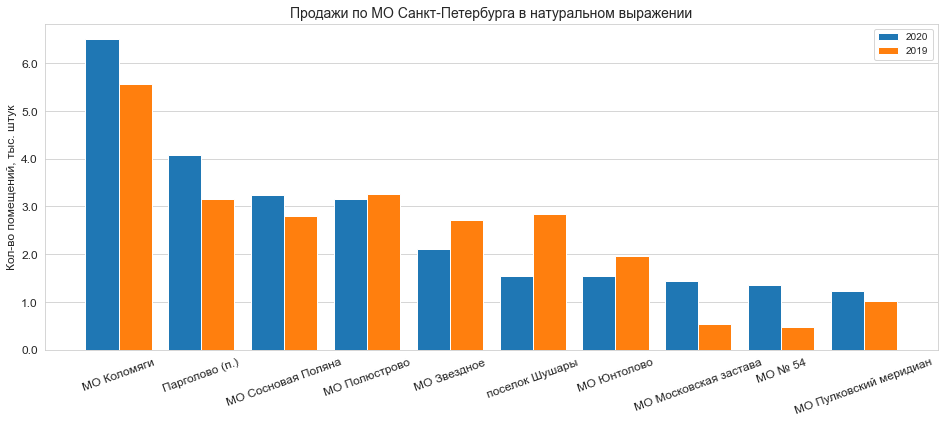

In [150]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(mun_spb_qua, 'Район Город', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по МО Санкт-Петербурга в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

> #### Ленинградская область

In [151]:
# Отбираем данные для региона:
atd_lo_rev = atd_year.loc[atd_year['Регион'] == 'Ленинградская область']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
atd_lo_qua = atd_year.loc[atd_year['Регион'] == 'Ленинградская область']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

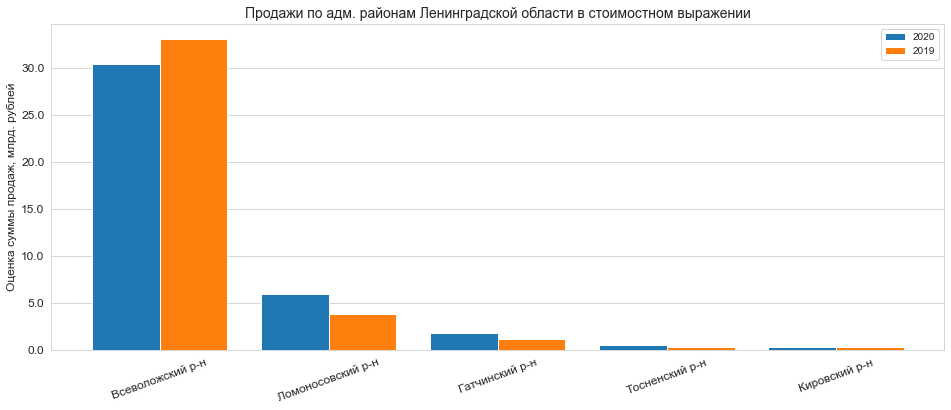

In [152]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(atd_lo_rev, 'АТД', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по адм. районам Ленинградской области в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

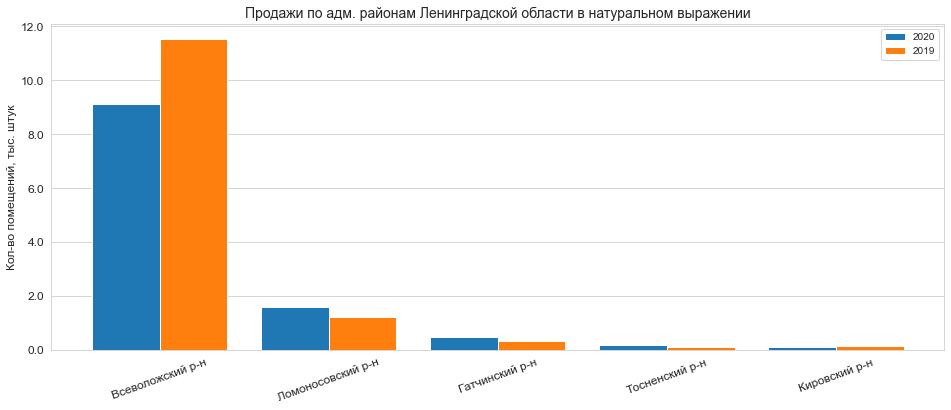

In [153]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(atd_lo_qua, 'АТД', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по адм. районам Ленинградской области в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

#### По муниципальным образованиям

In [154]:
# Отбираем данные для региона:
mun_lo_rev = mun_year.loc[mun_year['Регион'] == 'Ленинградская область']\
        .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
mun_lo_qua = mun_year.loc[mun_year['Регион'] == 'Ленинградская область']\
        .sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

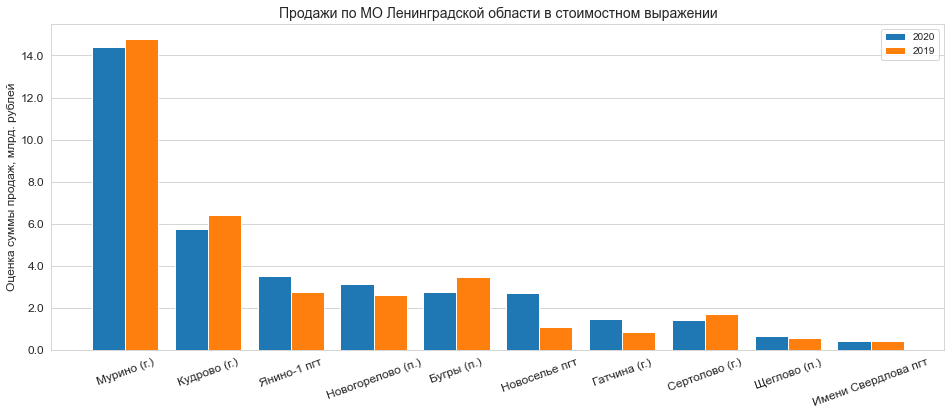

In [155]:
# Визуализируем данные в стоимостном выражении:
drawbarmpl(mun_lo_rev, 'Район Город', ('Оценка выручки', 2020), ('Оценка выручки', 2019), billions, 
           'Продажи по МО Ленинградской области в стоимостном выражении', 
           'Оценка суммы продаж, млрд. рублей', 20)

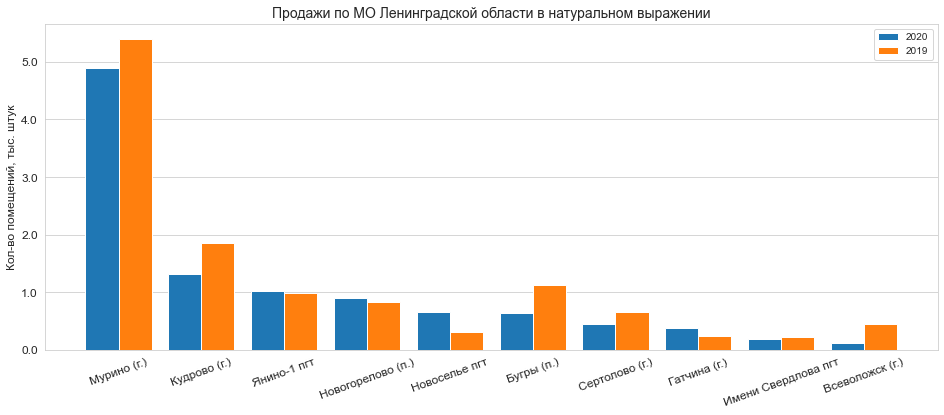

In [156]:
# Визуализируем данные в натуральном выражении:
drawbarmpl(mun_lo_qua, 'Район Город', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), thousands, 
           'Продажи по МО Ленинградской области в натуральном выражении', 
           'Кол-во помещений, тыс. штук', 20)

#### Средняя стоимость помещений

In [159]:
# Средняя стоимость по типам помещений:
average_cost_ = sel.groupby(['Тип помещения', 'Год']).mean()[['Оценка цены']].reset_index()\
    .rename(columns={'Оценка цены': 'Средняя стоимость'})
average_cost_

Тип помещения   Год  Средняя стоимость
0    апартамент  2019          7250068.9
1    апартамент  2020          6827064.0
2      квартира  2019          6090192.6
3      квартира  2020          7292539.9

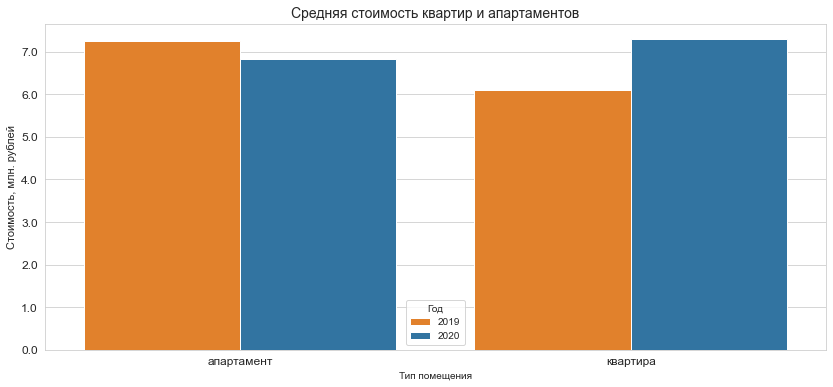

In [160]:
# Сравнение по годам для квартир и апартаментов:
drawbar('Тип помещения', 'Средняя стоимость', 'Год', average_cost_, 
        'Средняя стоимость квартир и апартаментов', 'Стоимость, млн. рублей', millions)

In [161]:
# Средняя стоимость помещений по адм.-территориальным единицам субъектов:
avcost_atd = sel.pivot_table(index = ['Тип помещения', 'Регион', 'АТД'], columns = 'Год', values = ['Оценка цены'],
                    aggfunc = {'Оценка цены': 'mean'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Средняя стоимость помещения'}).reset_index()
# avcost_atd
list_col = avcost_atd.columns.tolist()[3:]

# Приведем к числовому виду переменные:
avcost_atd[list_col] = avcost_atd[list_col].apply(pd.to_numeric)

In [162]:
# Средняя стоимость помещений по направлениям (округам) субъектов:
avcost_distr = sel.pivot_table(index = ['Тип помещения', 'Регион', 'Округ Направление'], columns = 'Год', values = ['Оценка цены'],
                    aggfunc = {'Оценка цены': 'mean'}, fill_value='')\
                    .rename(columns={'Оценка цены': 'Средняя стоимость помещения'}).reset_index()
avcost_distr
list_col = avcost_distr.columns.tolist()[3:]

# Приведем к числовому виду переменные:
avcost_distr[list_col] = avcost_distr[list_col].apply(pd.to_numeric)

> #### Москва и Новая Москва

In [163]:
# Отбираем данные для региона по квартирам:
avcost_atd_flatMsk = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'квартира') 
                                    & ((avcost_atd['Регион'] == 'Москва') | (avcost_atd['Регион'] == 'Новая Москва'))]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False)
# avcost_atd_flatMsk

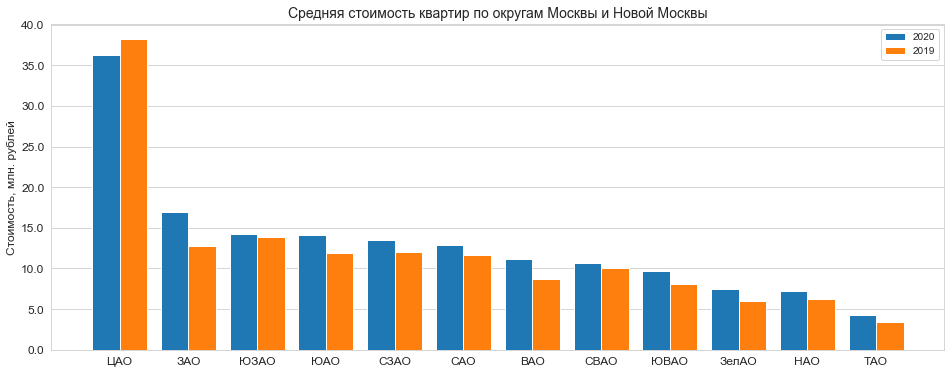

In [164]:
# Визуализируем данные:
drawbarmpl(avcost_atd_flatMsk, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость квартир по округам Москвы и Новой Москвы', 
           'Стоимость, млн. рублей', 0)

In [165]:
# Отбираем данные для региона по апартаментам:
avcost_atd_apartMsk = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'апартамент') 
                                    & ((avcost_atd['Регион'] == 'Москва') | (avcost_atd['Регион'] == 'Новая Москва'))]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False)
# avcost_atd_flatMsk

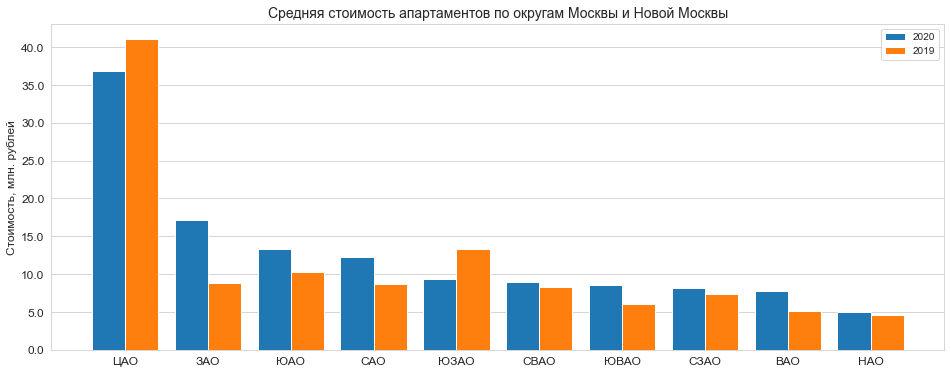

In [166]:
# Визуализируем данные:
drawbarmpl(avcost_atd_apartMsk, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость апартаментов по округам Москвы и Новой Москвы', 
           'Стоимость, млн. рублей', 0)

> #### Московская область

In [167]:
# Отбираем данные для региона по квартирам:
avcost_atd_flatMO = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'квартира') 
                                    & (avcost_atd['Регион'] == 'Московская область')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
avcost_atd_flatMO

Тип помещения              Регион                     АТД  \
Год                                                             
73       квартира  Московская область        Реутов гор.округ   
67       квартира  Московская область      Одинцово гор.округ   
57       квартира  Московская область    Котельники гор.округ   
58       квартира  Московская область   Красногорск гор.округ   
64       квартира  Московская область       Люберцы гор.округ   
66       квартира  Московская область  Наро-Фоминск гор.округ   
79       квартира  Московская область         Химки гор.округ   
65       квартира  Московская область        Мытищи гор.округ   
48       квартира  Московская область  Долгопрудный гор.округ   
59       квартира  Московская область     Ленинский гор.округ   

    Средняя стоимость помещения            
Год                        2019      2020  
73                    4980140.2 6230260.3  
67                    4580053.6 5736087.8  
57                    5840302.7 5636653.3  
58                    4520959.4 5324820.3  
64                    4738152.2 5316153.0  
66                    4192457.5 5028670.1  
79                    4412605.7 4917760.2  
65                    4505201.2 4904449.2  
48                    3603616.1 4902733.8  
59                    4460104.2 4813059.4

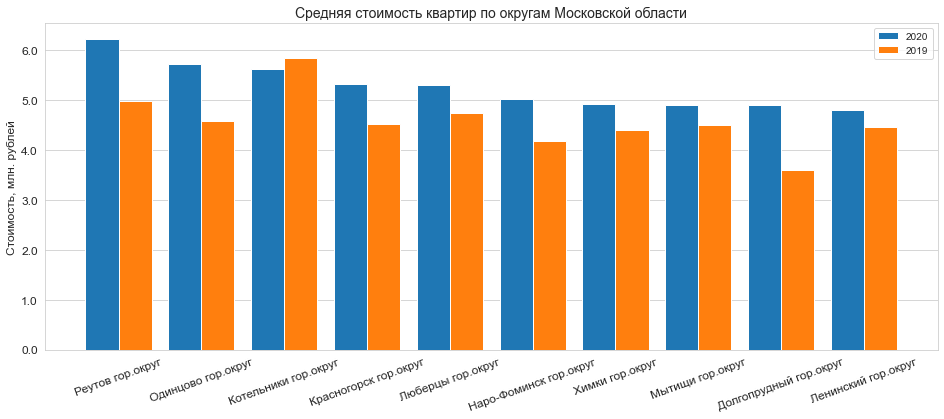

In [168]:
# Визуализируем данные:
drawbarmpl(avcost_atd_flatMO, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость квартир по округам Московской области', 
           'Стоимость, млн. рублей', 20)

In [169]:
# Отбираем данные для региона по апартаментам:
avcost_atd_apartMO = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'апартамент') 
                                    & (avcost_atd['Регион'] == 'Московская область')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
# avcost_atd_flatMO

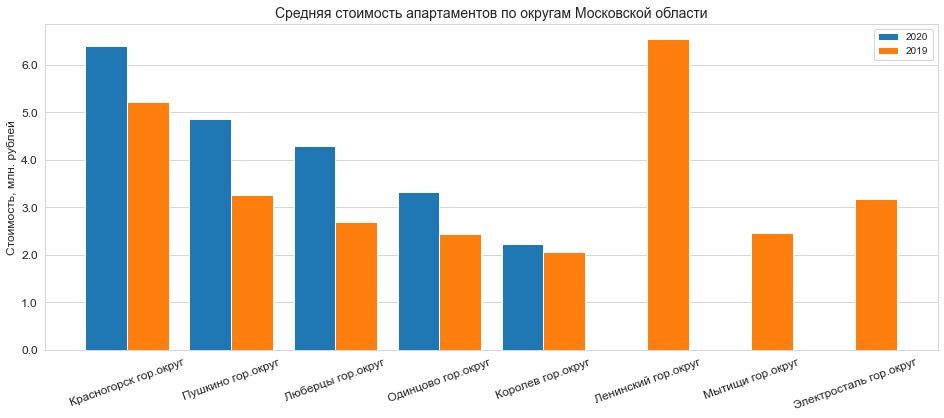

In [170]:
# Визуализируем данные:
drawbarmpl(avcost_atd_apartMO, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость апартаментов по округам Московской области', 
           'Стоимость, млн. рублей', 20)

In [171]:
# Отбираем данные для региона по квартирам:
avcost_distr_flatMO = avcost_distr.loc[(avcost_distr['Тип помещения'] == 'квартира') 
                                    & (avcost_distr['Регион'] == 'Московская область')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
# avcost_distr_flatMO

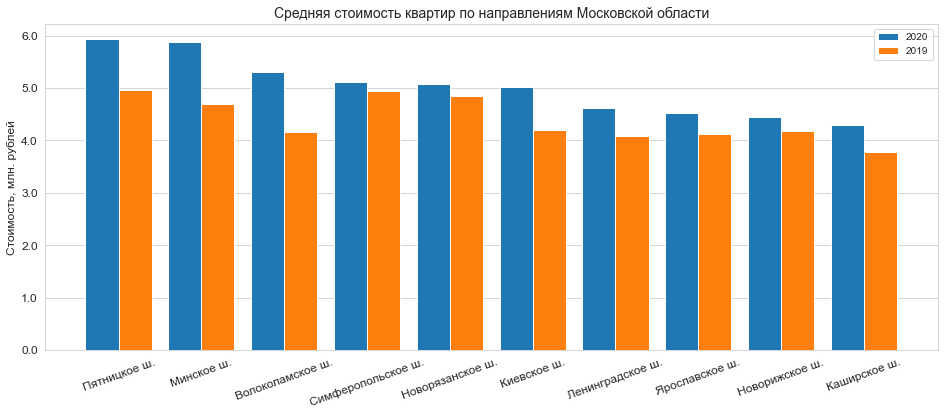

In [172]:
# Визуализируем данные:
drawbarmpl(avcost_distr_flatMO, 'Округ Направление', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость квартир по направлениям Московской области', 
           'Стоимость, млн. рублей', 20)

In [173]:
# Отбираем данные для региона по апартаментам:
avcost_distr_apartMO = avcost_distr.loc[(avcost_distr['Тип помещения'] == 'апартамент') 
                                    & (avcost_distr['Регион'] == 'Московская область')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
# avcost_distr_flatMO

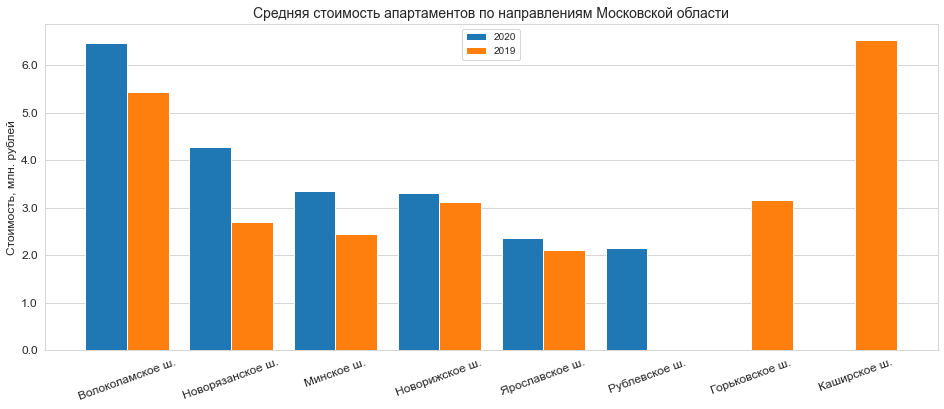

In [174]:
# Визуализируем данные:
drawbarmpl(avcost_distr_apartMO, 'Округ Направление', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость апартаментов по направлениям Московской области', 
           'Стоимость, млн. рублей', 20)

> #### Санкт-Петербург

In [175]:
# Отбираем данные для региона по квартирам:
avcost_atd_flatSpb = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'квартира') 
                                    & (avcost_atd['Регион'] == 'Санкт-Петербург')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
# avcost_atd_flatSpb

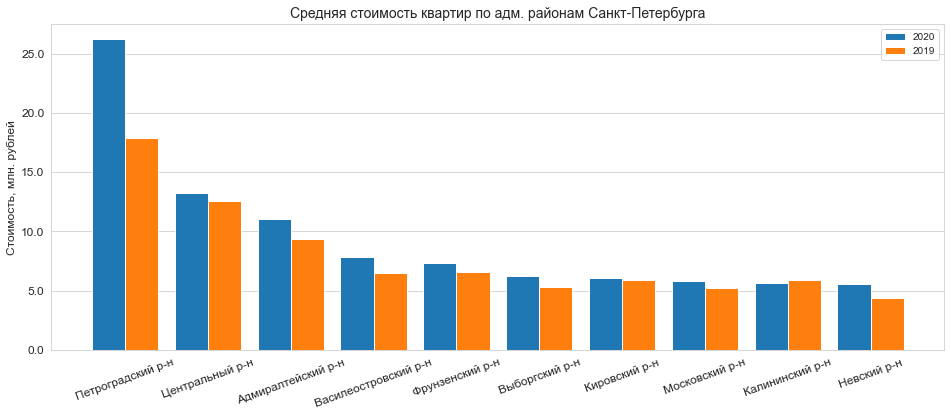

In [176]:
# Визуализируем данные:
drawbarmpl(avcost_atd_flatSpb, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость квартир по адм. районам Санкт-Петербурга', 
           'Стоимость, млн. рублей', 20)

In [177]:
# Отбираем данные для региона по апартаментам:
avcost_atd_apartSpb = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'апартамент') 
                                    & (avcost_atd['Регион'] == 'Санкт-Петербург')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
# avcost_atd_apartSpb

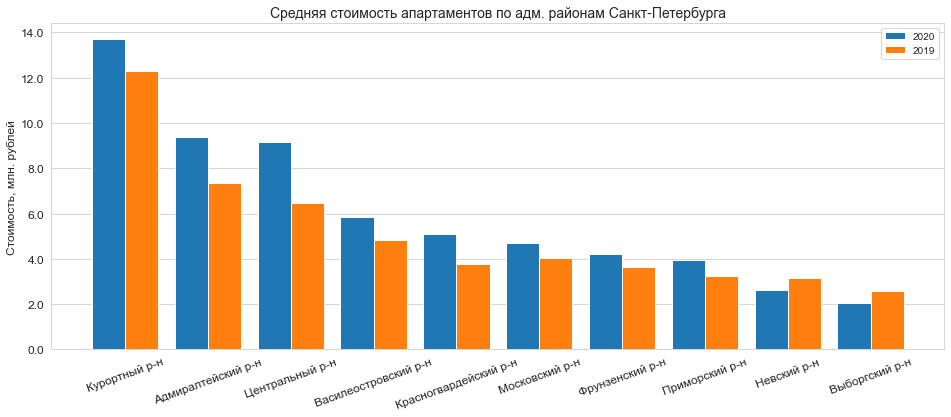

In [178]:
# Визуализируем данные:
drawbarmpl(avcost_atd_apartSpb, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость апартаментов по адм. районам Санкт-Петербурга', 
           'Стоимость, млн. рублей', 20)

> #### Ленинградская область

In [179]:
# Отбираем данные для региона по квартирам:
avcost_atd_flatLO = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'квартира') 
                                    & (avcost_atd['Регион'] == 'Ленинградская область')]\
                                    .sort_values(('Средняя стоимость помещения', 2020), ascending = False)
# avcost_atd_flatLO

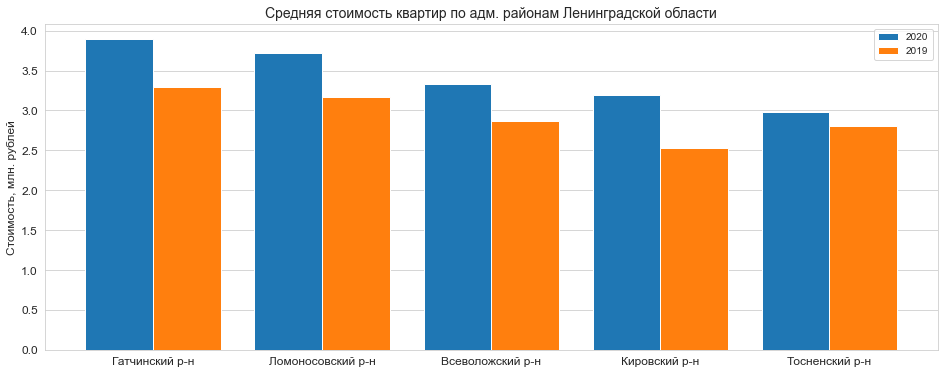

In [180]:
# Визуализируем данные:
drawbarmpl(avcost_atd_flatLO, 'АТД', ('Средняя стоимость помещения', 2020), ('Средняя стоимость помещения', 2019), 
           millions, 'Средняя стоимость квартир по адм. районам Ленинградской области', 
           'Стоимость, млн. рублей', 0)

In [181]:
# Апартаментов в Лениградской области нет:
# avcost_atd_apartLO = avcost_atd.loc[(avcost_atd['Тип помещения'] == 'апартамент') 
#                                     & (avcost_atd['Регион'] == 'Ленинградская область')]\
#                                     .sort_values(('Средняя стоимость помещения', 2020), ascending = False).head(10)
# avcost_atd_apartLO

#### Ведущие залогодержатели по регионам и классам помещений

> #### Москва и Московская область

In [182]:
# Агрегируем данные о залогодержателях в регионе по годам:
bank_Mskreg = sel.loc[(sel['Регион'] == 'Москва') | (sel['Регион'] == 'Новая Москва') 
                         | (sel['Регион'] == 'Московская область')]\
                        .pivot_table(index = ['Залогодержатель'], columns = 'Год', values = ['Оценка цены', 'Площадь'],
                        aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                        .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# bank_Mskreg.head()

In [183]:
# Приведем к числовому виду переменные:
list_col = bank_Mskreg.columns.tolist()[1:]
# list_col
bank_Mskreg[list_col] = bank_Mskreg[list_col].apply(pd.to_numeric)

In [184]:
# Отбираем лидеров по выручке:
bank_Mskreg_rev = bank_Mskreg.sort_values(('Оценка выручки', 2020), ascending = False).head(10)

# И по кол-ву помещений в залоге:
bank_Mskreg_qua = bank_Mskreg.sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

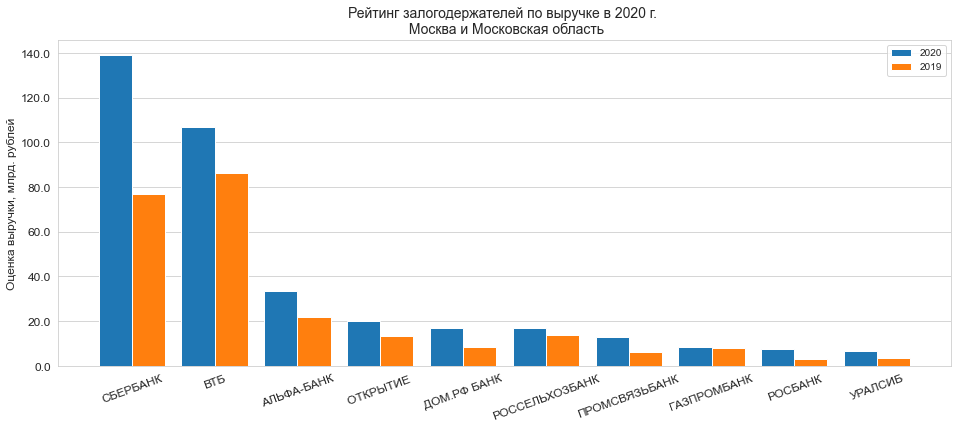

In [185]:
# Визуализируем эти данные:
drawbarmpl(bank_Mskreg_rev, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Москва и Московская область', 
           'Оценка выручки, млрд. рублей', 20)

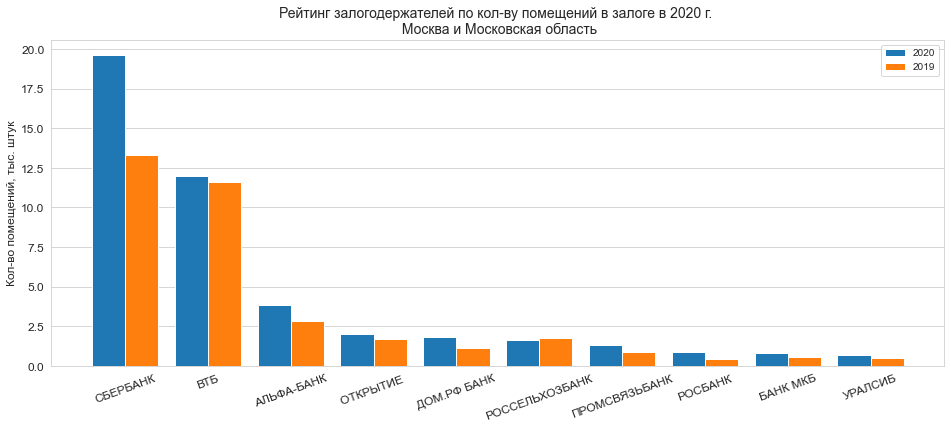

In [186]:
# Визуализируем эти данные:
drawbarmpl(bank_Mskreg_qua, 'Залогодержатель', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), 
           thousands, 'Рейтинг залогодержателей по кол-ву помещений в залоге в 2020 г. \n Москва и Московская область', 
           'Кол-во помещений, тыс. штук', 20)

> #### Москва и Московская область
по классам помещений

In [187]:
# Продажи по субъектам и территориям:
banks = sel.groupby(['Залогодержатель', 'Регион', 'Год', 'класс']).agg({'Оценка цены': 'sum', 'Площадь': 'count'}).reset_index()\
    .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'})
banks.head()

Залогодержатель                 Регион   Год  \
0  "ПАО " Сбербанк"ХК СУИХОЛДИНГ                 Москва  2020   
1                          "ЭКЗ"     Московская область  2020   
2           Poccийcкaя Фeдepaция        Санкт-Петербург  2019   
3           Poccийcкaя Фeдepaция        Санкт-Петербург  2019   
4                   АБСОЛЮТ БАНК  Ленинградская область  2019   

             класс  Оценка выручки  Кол-во помещений  
0          комфорт       6091759.0                 1  
1           эконом       3366204.0                 1  
2          комфорт      35236581.0                10  
3  эконом (панель)       8284898.0                 2  
4          комфорт     129891990.0                34

In [188]:
# Объеденим данные по классам эконом и эконом (панель):
banks['класс'] = banks['класс'].replace('эконом (панель)', 'эконом')
# banks['класс'].value_counts()

In [189]:
# Агрегируем данные о залогодержателях в регионе по годам и классам:
bank_Mskreg_cl = banks.loc[(banks['Регион'] == 'Москва') | (banks['Регион'] == 'Новая Москва') 
                         | (banks['Регион'] == 'Московская область')]\
                        .pivot_table(index = ['Залогодержатель', 'класс'], columns = 'Год', values = ['Оценка выручки', 'Кол-во помещений'],
                        aggfunc = {'Оценка выручки': 'sum', 'Кол-во помещений': 'sum'}, fill_value='').reset_index()
# bank_Mskreg_cl.head(10)

In [190]:
# Приведем к числовому виду переменные:
list_col = bank_Mskreg_cl.columns.tolist()[2:]
# list_col
bank_Mskreg_cl[list_col] = bank_Mskreg_cl[list_col].apply(pd.to_numeric)

#### эконом-класс

In [191]:
# Отбираем лидеров по выручке в эконом-классе:
bank_Mskreg_ec = bank_Mskreg_cl.loc[bank_Mskreg_cl['класс'] == 'эконом']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Mskreg_ec

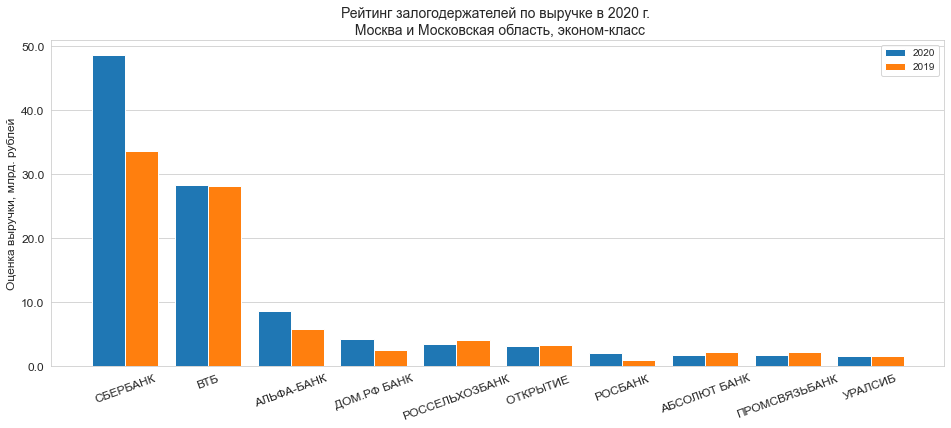

In [192]:
# Визуализируем эти данные:
drawbarmpl(bank_Mskreg_ec, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Москва и Московская область, эконом-класс', 
           'Оценка выручки, млрд. рублей', 20)

#### комфорт-класс

In [193]:
# Отбираем лидеров по выручке в комфорт-классе:
bank_Mskreg_com = bank_Mskreg_cl.loc[bank_Mskreg_cl['класс'] == 'комфорт']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Mskreg_com

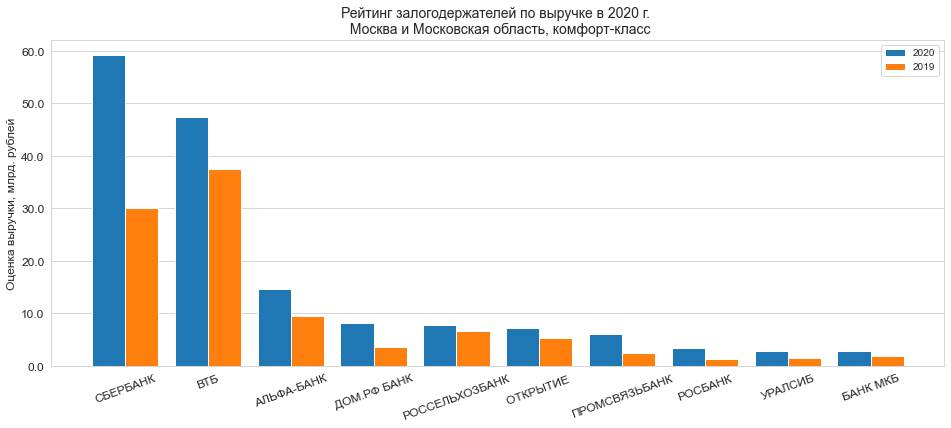

In [194]:
# Визуализируем эти данные:
drawbarmpl(bank_Mskreg_com, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Москва и Московская область, комфорт-класс', 
           'Оценка выручки, млрд. рублей', 20)

#### премиум-класс

In [195]:
# Отбираем лидеров по выручке в премиум-классе:
bank_Mskreg_pr = bank_Mskreg_cl.loc[bank_Mskreg_cl['класс'] == 'премиум']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Mskreg_pr

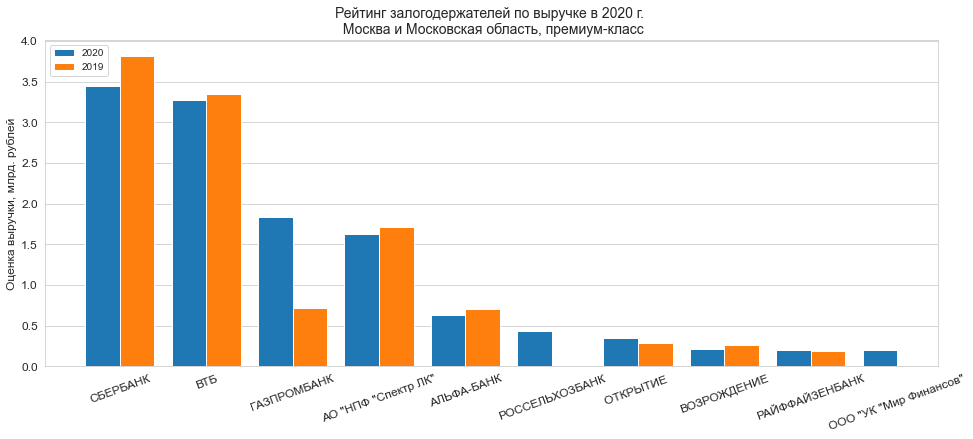

In [196]:
# Визуализируем эти данные:
drawbarmpl(bank_Mskreg_pr, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Москва и Московская область, премиум-класс', 
           'Оценка выручки, млрд. рублей', 20)

#### делюкс-класс

In [197]:
# Отбираем лидеров по выручке в делюкс-классе:
bank_Mskreg_dl = bank_Mskreg_cl.loc[bank_Mskreg_cl['класс'] == 'де-люкс']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Mskreg_dl

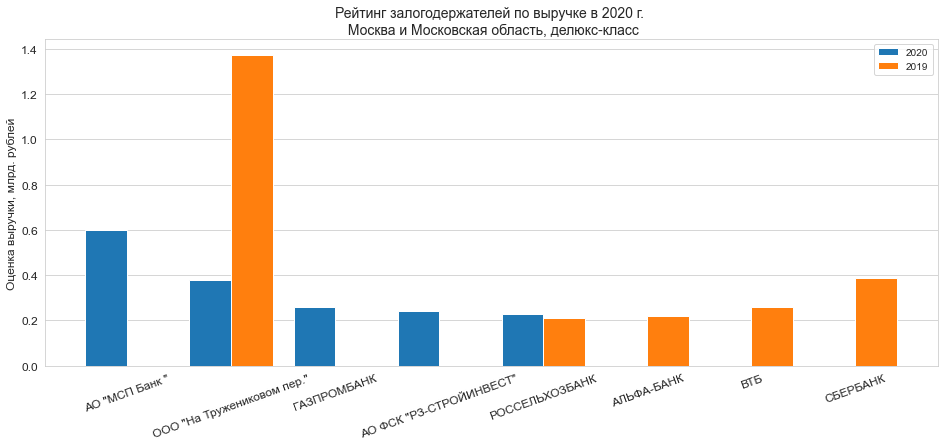

In [198]:
# Визуализируем эти данные:
drawbarmpl(bank_Mskreg_dl, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Москва и Московская область, делюкс-класс', 
           'Оценка выручки, млрд. рублей', 20)

> #### Санкт-Петербург и Ленинградская область

In [199]:
# Агрегируем данные о залогодержателях в регионе по годам:
bank_Spbreg = sel.loc[(sel['Регион'] == 'Санкт-Петербург') | (sel['Регион'] == 'Ленинградская область')]\
                        .pivot_table(index = ['Залогодержатель'], columns = 'Год', values = ['Оценка цены', 'Площадь'],
                        aggfunc = {'Оценка цены': 'sum', 'Площадь': 'count'}, fill_value='')\
                        .rename(columns={'Оценка цены': 'Оценка выручки','Площадь': 'Кол-во помещений'}).reset_index()
# bank_Spbreg.head()

In [200]:
# Приведем к числовому виду переменные:
list_col = bank_Spbreg.columns.tolist()[1:]
# list_col
bank_Spbreg[list_col] = bank_Spbreg[list_col].apply(pd.to_numeric)

In [201]:
# Отбираем лидеров по выручке:
bank_Spbreg_rev = bank_Spbreg.sort_values(('Оценка выручки', 2020), ascending = False).head(10)

# И по кол-ву помещений в залоге:
bank_Spbreg_qua = bank_Spbreg.sort_values(('Кол-во помещений', 2020), ascending = False).head(10)

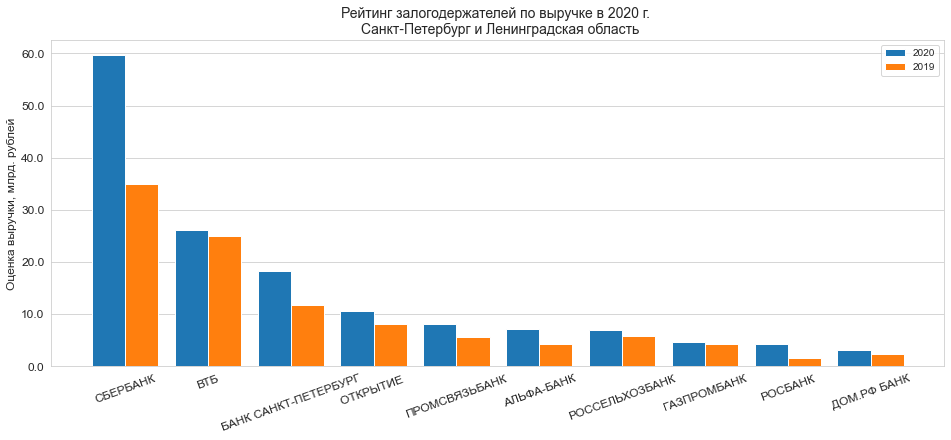

In [202]:
# Визуализируем рейтинг по выручке:
drawbarmpl(bank_Spbreg_rev, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Санкт-Петербург и Ленинградская область', 
           'Оценка выручки, млрд. рублей', 20)

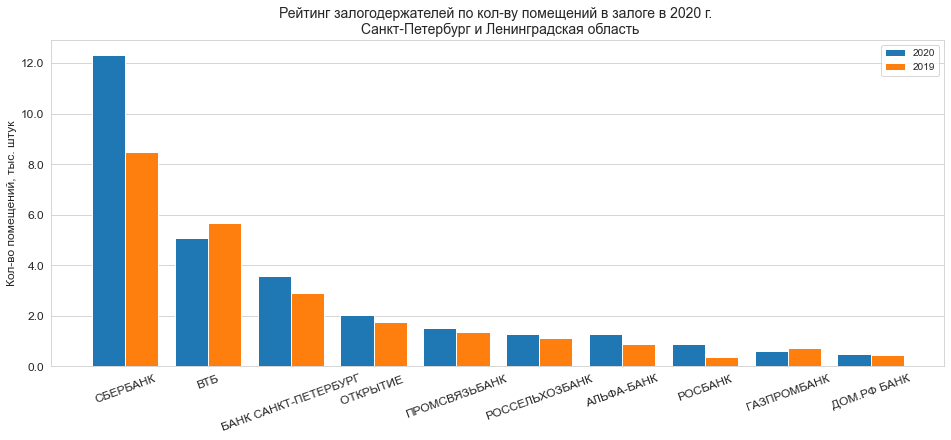

In [203]:
# Визуализируем рейтинг по кол-ву помещений в залоге:
drawbarmpl(bank_Spbreg_qua, 'Залогодержатель', ('Кол-во помещений', 2020), ('Кол-во помещений', 2019), 
           thousands, 'Рейтинг залогодержателей по кол-ву помещений в залоге в 2020 г. \n Санкт-Петербург и Ленинградская область', 
           'Кол-во помещений, тыс. штук', 20)

In [204]:
# Агрегируем данные о залогодержателях в регионе по годам и классам:
# здесь эконом-класс включает эконом-класс (панель)
bank_Spbreg_cl = banks.loc[(banks['Регион'] == 'Санкт-Петербург') | (banks['Регион'] == 'Ленинградская область')]\
                        .pivot_table(index = ['Залогодержатель', 'класс'], columns = 'Год', values = ['Оценка выручки', 'Кол-во помещений'],
                        aggfunc = {'Оценка выручки': 'sum', 'Кол-во помещений': 'sum'}, fill_value='').reset_index()
bank_Spbreg_cl.head(10)

Залогодержатель    класс Кол-во помещений       Оценка выручки  \
Год                                                2019  2020           2019   
0        Poccийcкaя Фeдepaция  комфорт             10.0           35236581.0   
1        Poccийcкaя Фeдepaция   эконом              2.0            8284898.0   
2                АБСОЛЮТ БАНК   бизнес             38.0  27.0    273867994.0   
3                АБСОЛЮТ БАНК  комфорт            215.0 195.0    845391171.0   
4                АБСОЛЮТ БАНК  премиум              1.0   1.0      9877725.0   
5                АБСОЛЮТ БАНК   эконом             40.0  36.0    143816110.0   
6                     АК БАРС   бизнес             10.0  20.0     62126200.0   
7                     АК БАРС  комфорт            168.0 216.0    598344420.0   
8                     АК БАРС   эконом             58.0  62.0    173757358.0   
9    АКБ "Абсолют Банк" (ПАО)   бизнес                    1.0                  

                  
Год         2020  
0                 
1                 
2    173725194.0  
3    875640269.0  
4     30433554.0  
5    174171646.0  
6    175154748.0  
7   1033204434.0  
8    227478521.0  
9      8901631.0

In [205]:
# Приведем к числовому виду переменные:
list_col = bank_Spbreg_cl.columns.tolist()[2:]
# list_col
bank_Spbreg_cl[list_col] = bank_Spbreg_cl[list_col].apply(pd.to_numeric)

#### эконом-класс

In [206]:
# Отбираем лидеров по выручке в эконом-классе:
bank_Spbreg_ec = bank_Spbreg_cl.loc[bank_Spbreg_cl['класс'] == 'эконом']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Spbreg_ec

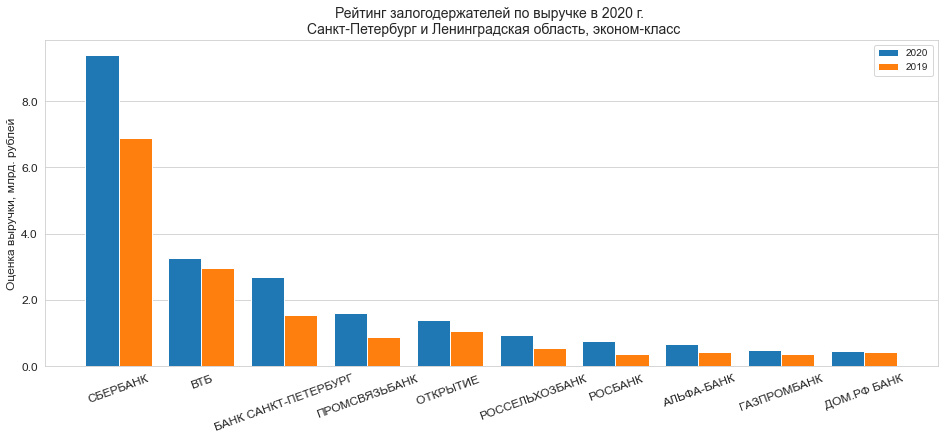

In [207]:
# Визуализируем эти данные:
drawbarmpl(bank_Spbreg_ec, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Санкт-Петербург и Ленинградская область, эконом-класс', 
           'Оценка выручки, млрд. рублей', 20)

#### комфорт-класс

In [208]:
# Отбираем лидеров по выручке в комфорт-классе:
bank_Spbreg_com = bank_Spbreg_cl.loc[bank_Spbreg_cl['класс'] == 'комфорт']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Spbreg_com

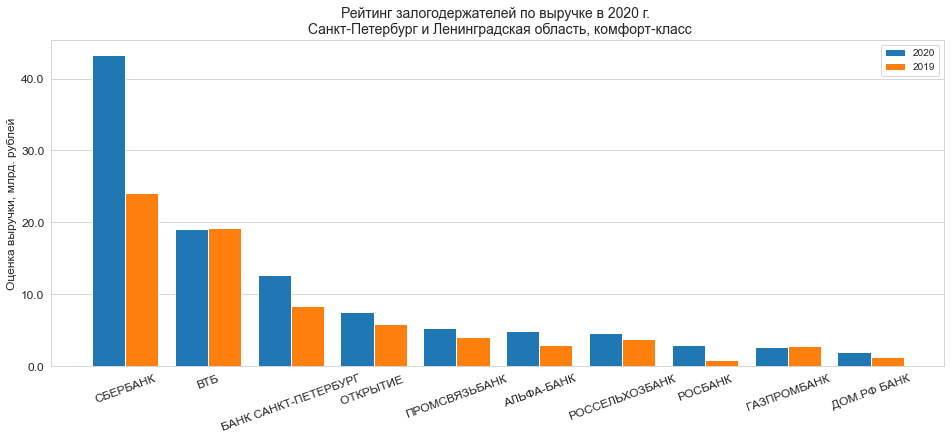

In [209]:
# Визуализируем эти данные:
drawbarmpl(bank_Spbreg_com, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           billions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Санкт-Петербург и Ленинградская область, комфорт-класс', 
           'Оценка выручки, млрд. рублей', 20)

#### премиум-класс

In [210]:
# Отбираем лидеров по выручке в премиум-классе:
bank_Spbreg_pr = bank_Spbreg_cl.loc[bank_Spbreg_cl['класс'] == 'премиум']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Spbreg_pr

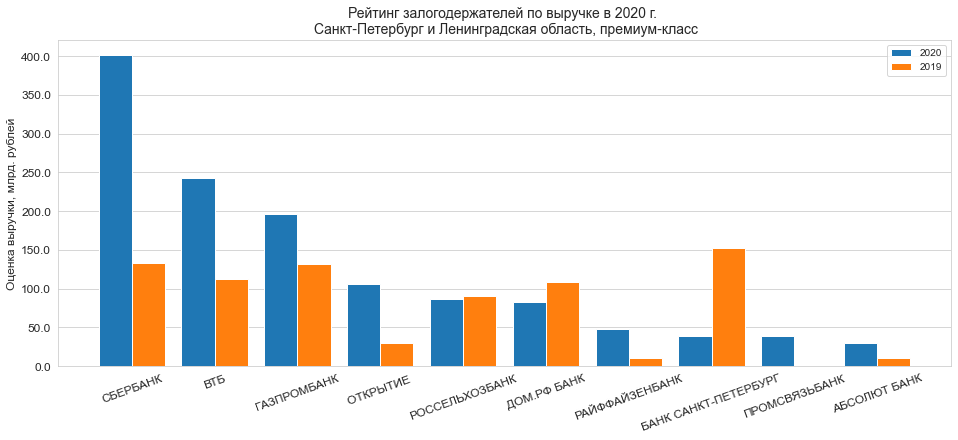

In [211]:
# Визуализируем эти данные:
drawbarmpl(bank_Spbreg_pr, 'Залогодержатель', ('Оценка выручки', 2020), ('Оценка выручки', 2019), 
           millions, 'Рейтинг залогодержателей по выручке в 2020 г. \n Санкт-Петербург и Ленинградская область, премиум-класс', 
           'Оценка выручки, млрд. рублей', 20)

#### делюкс-класс

In [212]:
# С помещениями делюкс-класса в Петербурге и области не было сделок:
bank_Spbreg_dl = bank_Spbreg_cl.loc[bank_Spbreg_cl['класс'] == 'де-люкс']\
                    .sort_values(('Оценка выручки', 2020), ascending = False).head(10)
# bank_Spbreg_dl
bank_Spbreg_dl.shape[0]

0

#### Ведущие застройщики

In [213]:
# Посчитаем средние для 2020 г.:
# Средняя стоимость помещения:
average_cost = sel.loc[sel['Год'] == 2020]['Оценка цены'].mean()
# Средняя стоимость помещения:
average_cost1 = sel.loc[sel['Год'] == 2020]['Оценка цены 1 кв.м'].mean()
# Средняя стоимость помещения:
average_area = sel.loc[sel['Год'] == 2020]['Площадь'].mean()

In [214]:
# Агрегируем данные о продажах застройщиков:
dev_average = sel.pivot_table(index = 'Застройщик ЖК', columns = 'Год', values = ['Оценка цены', 'Оценка цены 1 кв.м', 'Площадь'],
                    aggfunc = {'Оценка цены': ['sum', 'mean'], 'Оценка цены 1 кв.м': 'mean', 'Площадь': 'mean'}, fill_value='')\
                    .reset_index()
# dev_average

In [215]:
list_col = dev_average.columns.tolist()[1:]

# Приведем к числовому виду переменные:
dev_average[list_col] = dev_average[list_col].apply(pd.to_numeric)

In [216]:
# Топ-10 застройщиков по выручке:
topdev2020 = dev_average.sort_values(('Оценка цены', 'sum', 2020), ascending = False).head(10)
# topdev2020

In [217]:
# Ранжируем их по показателю ср. стоимости помещения:
topdev2020_cost = topdev2020.sort_values(('Оценка цены', 'mean', 2020), ascending = False)
# topdev2020_cost

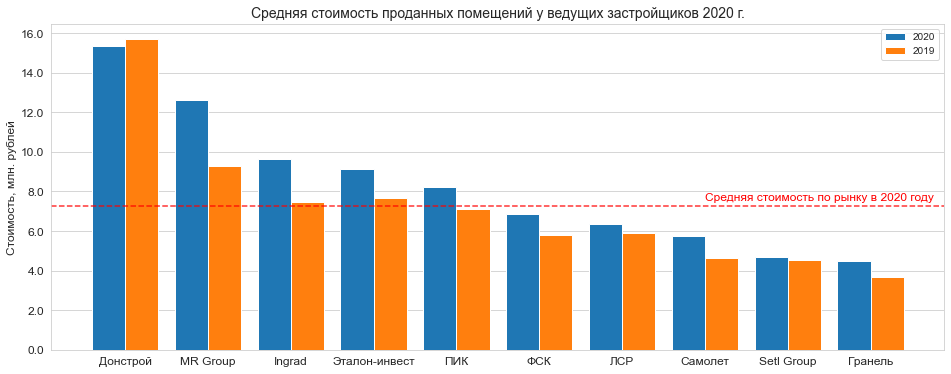

In [218]:
# Визуализируем эти данные:
dev_list = topdev2020_cost[('Застройщик ЖК', '', '')].unique()
g1 = topdev2020_cost[('Оценка цены', 'mean', 2020)].tolist()
g2 = topdev2020_cost[('Оценка цены', 'mean', 2019)].tolist()
width = 0.4
x = np.arange(len(dev_list))
fig, ax = plt.subplots(figsize=(16,6))
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
rects1 = ax.bar(x - width/2, g1, width, label='2020')
rects2 = ax.bar(x + width/2, g2, width, label='2019')
ax.set_title('Cредняя стоимость проданных помещений у ведущих застройщиков 2020 г.', size=14, loc='center')
# ax.set_ylabel('рублей')
ax.set_xticks(x)
ax.set_xticklabels(dev_list)
ax.legend()

plt.tick_params(axis='both', which='major', labelsize=12)
# plt.xlabel('Застройщики', fontsize=12)
plt.ylabel('Стоимость, млн. рублей', fontsize=12)
plt.grid(axis = 'x')
# ax.axvline(x_val, color='red')
plt.axhline(average_cost, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.text(len(dev_list)-3, average_cost+300000, 'Средняя стоимость по рынку в 2020 году', fontsize = 12, color = 'red')
# loc='upper left'
plt.show()

In [219]:
# Ранжируем ведущих застройщиков по показателю ср. стоимости 1 кв. м площади помещений:
topdev2020_cost1 = topdev2020.sort_values(('Оценка цены 1 кв.м', 'mean', 2020), ascending = False)
# topdev2020_cost1

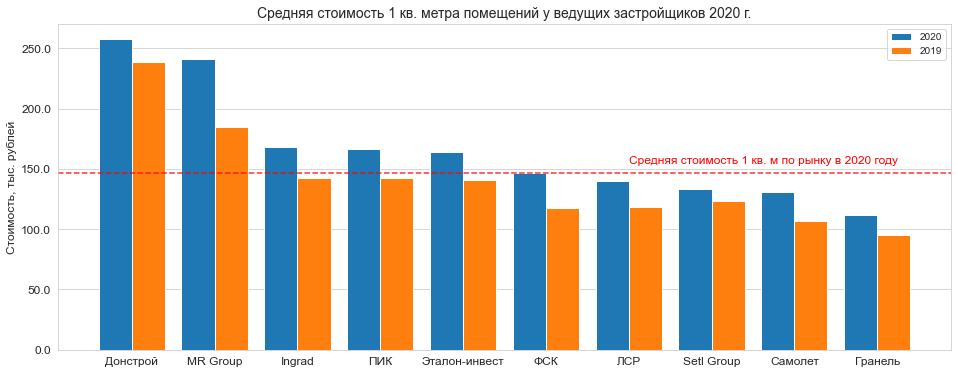

In [220]:
# Визуализируем эти данные:
dev_list = topdev2020_cost1[('Застройщик ЖК', '', '')].unique()
g1 = topdev2020_cost1[('Оценка цены 1 кв.м', 'mean', 2020)].tolist()
g2 = topdev2020_cost1[('Оценка цены 1 кв.м', 'mean', 2019)].tolist()
width = 0.4
x = np.arange(len(dev_list))
fig, ax = plt.subplots(figsize=(16,6))
formatter = FuncFormatter(thousands)
ax.yaxis.set_major_formatter(formatter)
rects1 = ax.bar(x - width/2, g1, width, label='2020')
rects2 = ax.bar(x + width/2, g2, width, label='2019')
ax.set_title('Cредняя стоимость 1 кв. метра помещений у ведущих застройщиков 2020 г.', size=14, loc='center')
# ax.set_ylabel('рублей')
ax.set_xticks(x)
ax.set_xticklabels(dev_list)
ax.legend()

plt.tick_params(axis='both', which='major', labelsize=12)

# plt.xlabel('Застройщики', fontsize=12)
plt.ylabel('Стоимость, тыс. рублей', fontsize=12)
plt.grid(axis = 'x')
# ax.axvline(x_val, color='red')
plt.axhline(average_cost1, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.text(len(dev_list)-4, average_cost1+8000, 'Средняя стоимость 1 кв. м по рынку в 2020 году', fontsize = 12, color = 'red')
# loc='upper left'
plt.show()

In [221]:
# Ранжируем ведущих застройщиков по показателю ср. площади помещений:
topdev2020_area = topdev2020.sort_values(('Площадь', 'mean', 2020), ascending = False)
topdev2020_area

Застройщик ЖК Оценка цены                                          \
                          mean                      sum                  
Год                       2019       2020          2019           2020   
154       Донстрой  15690254.7 15347884.7 18969517924.0  38738060977.0   
413  Эталон-инвест   7665029.8  9133660.7 25394243584.0  21939053035.0   
22          Ingrad   7462141.5  9646061.2 28632237073.0  35931578020.0   
34        MR Group   9256925.1 12591609.8 20383748988.0  34778026176.0   
260            ПИК   7112920.9  8243424.2 95014396829.0 117411090469.0   
389            ФСК   5816475.8  6878929.2 25749538228.0  26965402543.0   
323        Самолет   4626365.3  5747192.2 26536831414.0  37126861605.0   
206            ЛСР   5904893.1  6359516.4 36238329126.0  39944122607.0   
140        Гранель   3695747.4  4468971.4 25275216357.0  31126385682.0   
54      Setl Group   4536970.9  4698039.3 67156243472.0  51936824766.0   

    Оценка цены 1 кв.м          Площадь       
                  mean             mean       
Год               2019     2020    2019 2020  
154           239036.3 257594.7    61.4 58.4  
413           140419.3 163640.6    52.8 54.6  
22            142107.9 168313.6    50.5 54.0  
34            184500.9 241308.3    49.8 51.7  
260           142589.2 166133.2    51.0 51.3  
389           117318.0 146941.1    49.6 47.1  
323           107150.7 131210.2    44.6 45.0  
206           118487.3 139891.1    48.1 44.0  
140            95448.7 112059.1    39.4 40.3  
54            123306.9 133458.0    35.7 34.7

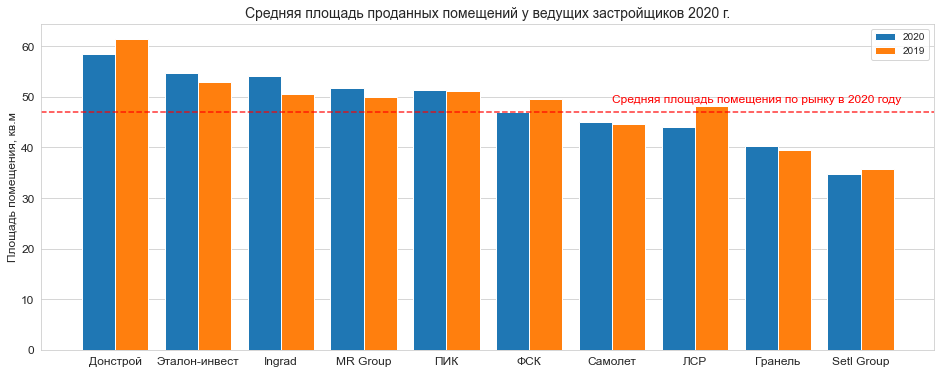

In [222]:
# Визуализируем эти данные:
dev_list = topdev2020_area[('Застройщик ЖК', '', '')].unique()
g1 = topdev2020_area[('Площадь', 'mean', 2020)].tolist()
g2 = topdev2020_area[('Площадь', 'mean', 2019)].tolist()
width = 0.4
x = np.arange(len(dev_list))
fig, ax = plt.subplots(figsize=(16,6))
rects1 = ax.bar(x - width/2, g1, width, label='2020')
rects2 = ax.bar(x + width/2, g2, width, label='2019')
ax.set_title('Cредняя площадь проданных помещений у ведущих застройщиков 2020 г.', size=14, loc='center')
# ax.set_ylabel('рублей')
ax.set_xticks(x)
ax.set_xticklabels(dev_list)
ax.legend()

plt.tick_params(axis='both', which='major', labelsize=12)

# plt.xlabel('Застройщики', fontsize=12)
plt.ylabel('Площадь помещения, кв.м', fontsize=12)
plt.grid(axis = 'x')
# ax.axvline(x_val, color='red')
plt.axhline(average_area, color = 'red', alpha=0.8, linestyle = 'dashed')
plt.text(len(dev_list)-4, average_area+2, 'Средняя площадь помещения по рынку в 2020 году', fontsize = 12, color = 'red')
# loc='upper left'
plt.show()

In [223]:
# Список застройщиков, ранжированный по убыванию стоимости 1 кв.м
# dev_cost1 = sel.groupby(['Застройщик ЖК']).agg({'Оценка цены 1 кв.м': 'mean'}).reset_index().sort_values('Оценка цены 1 кв.м', ascending = False)
# dev_cost1

#### Средние значения показателей продаж по классам помещений

In [224]:
# Средние по классам помещений:
class_ = sel.groupby(['класс', 'Год']).agg({'Оценка цены': 'mean', 'Оценка цены 1 кв.м': 'mean','Площадь': 'mean'}).reset_index()\
    .rename(columns={'Оценка цены': 'Средняя стоимость','Оценка цены 1 кв.м': 'Средняя стоимость 1 кв.м',
                     'Площадь': 'Средняя площадь'})
class_

класс   Год  Средняя стоимость  Средняя стоимость 1 кв.м  \
0            бизнес  2019         11548001.4                  196685.4   
1            бизнес  2020         13338142.8                  230890.9   
2           де-люкс  2019        153758491.9                 1074006.7   
3           де-люкс  2020        193478017.0                 1293765.8   
4           комфорт  2019          5286174.8                  119081.2   
5           комфорт  2020          6114710.1                  136715.1   
6           премиум  2019         41470700.6                  429039.2   
7           премиум  2020         55564529.3                  520773.4   
8            эконом  2019          3581272.7                   84023.8   
9            эконом  2020          4155819.4                   95531.2   
10  эконом (панель)  2019          5688868.9                  115162.7   
11  эконом (панель)  2020          6054702.7                  131022.6   

    Средняя площадь  
0              57.5  
1              57.1  
2             142.7  
3             157.9  
4              44.0  
5              44.1  
6              90.1  
7              99.1  
8              43.1  
9              44.2  
10             49.9  
11             47.1

In [225]:
# Средняя стоимость помещений по классам:
class_avcost = class_.sort_values(['Средняя стоимость', 'Год'], ascending = [False, True])
# class_avcost

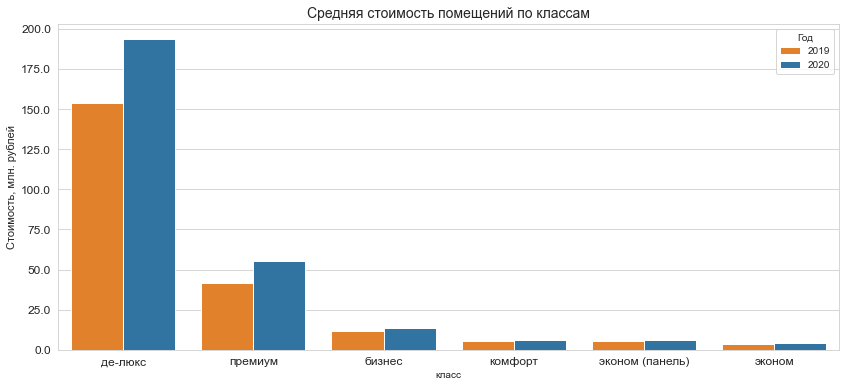

In [226]:
# Визуализируем:
drawbar('класс', 'Средняя стоимость', 'Год', class_avcost, 'Средняя стоимость помещений по классам', 
        'Стоимость, млн. рублей', millions)

In [227]:
# Средняя стоимость 1 кв. метра помещений по классам:
class_avcost1 = class_.sort_values(['Средняя стоимость 1 кв.м', 'Год'], ascending = [False, True])
# class_avcost1

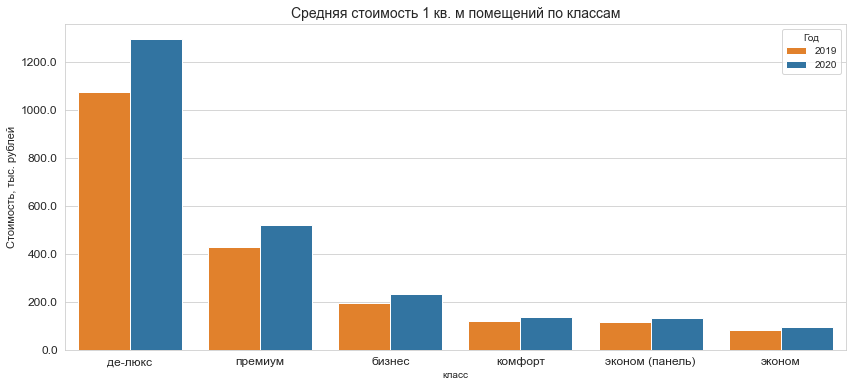

In [228]:
# Визуализируем:
drawbar('класс', 'Средняя стоимость 1 кв.м', 'Год', class_avcost1, 'Средняя стоимость 1 кв. м помещений по классам', 
        'Стоимость, тыс. рублей', thousands)

In [229]:
# Средняя площадь помещений по классам:
class_avarea = class_.sort_values(['Средняя площадь', 'Год'], ascending = [False, True])
# class_avarea

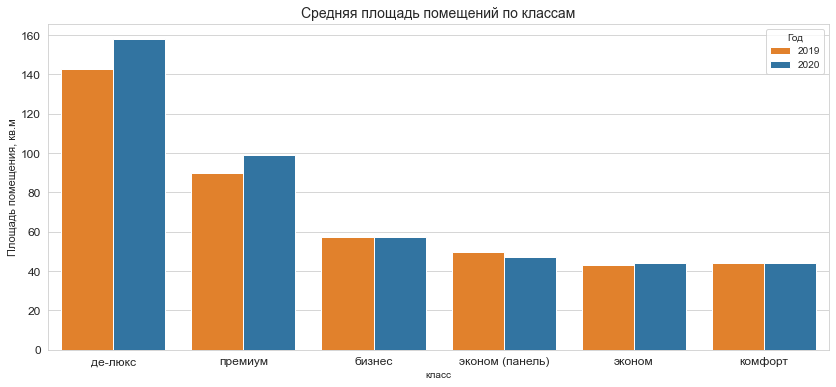

In [230]:
# Визуализируем:
drawbar('класс', 'Средняя площадь', 'Год', class_avarea, 'Средняя площадь помещений по классам', 
        'Площадь помещения, кв.м', things)

In [231]:
# Сохраняем полученный массив в файл:
sel.to_csv('sel2.csv', index = False) # header = True по умолчанию